In [1]:
!gdown 1Zi88cQmN_6Wn-tBTQS7N6qUzzj1KU1jY


Downloading...
From: https://drive.google.com/uc?id=1Zi88cQmN_6Wn-tBTQS7N6qUzzj1KU1jY
To: /content/All_data2.xlsx
100% 16.2k/16.2k [00:00<00:00, 30.2MB/s]


# DATA ANALYSIS

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Step 1: Load the Data and Understand the Columns

# Load the data from the Excel file
file_path = '/content/All_data2.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows and column names to understand the data
print("Data Columns:", data.columns)
data.head()


Data Columns: Index(['Year of construct', 'location',
       'Duration of construction/Demolition (Month)', 'Type of building',
       'Total Area of Building', 'Number of floor', 'Site access',
       'Amount of Waste (No. of Trucks)'],
      dtype='object')


,Year of construct,location,Duration of construction/Demolition (Month),Type of building,Total Area of Building,Number of floor,Site access,Amount of Waste (No. of Trucks)
0,I1,I2,I3,I4,I5,I6,I7,Oi
1,0.909091,0.25,0.029412,0.75,0.012313,0,0,0.03125
2,0.909091,0,0,0.75,0.001493,0.071429,0,0
3,0.909091,0.25,0.294118,0.75,0.087313,0.142857,0,0.03125
4,0.909091,0.25,0,1,0,0,0,0


In [3]:
from sklearn.impute import SimpleImputer

data2=data
# Check which columns are numerical and which are categorical
numerical_cols = data2.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = data2.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Impute missing values
if numerical_cols:
    # Impute numerical columns with mean
    imputer_num = SimpleImputer(strategy='mean')
    data2[numerical_cols] = imputer_num.fit_transform(data2[numerical_cols])

if categorical_cols:
    # Impute categorical columns with the most frequent value
    imputer_cat = SimpleImputer(strategy='most_frequent')
    data2[categorical_cols] = imputer_cat.fit_transform(data2[categorical_cols])

# Verify that there are no more missing values
print("Missing values after imputation:")
# print(X.isnull().sum())
data_all = data2.drop(index=0).reset_index(drop=True)
# data_all=X
# X=[]
data_all= data_all.dropna()
data_all.head()


Numerical columns: []
Categorical columns: ['Year of construct', 'location', 'Duration of construction/Demolition (Month)', 'Type of building', 'Total Area of Building', 'Number of floor', 'Site access', 'Amount of Waste (No. of Trucks)']
Missing values after imputation:


,Year of construct,location,Duration of construction/Demolition (Month),Type of building,Total Area of Building,Number of floor,Site access,Amount of Waste (No. of Trucks)
0,0.909091,0.25,0.029412,0.75,0.012313,0,0,0.03125
1,0.909091,0,0,0.75,0.001493,0.071429,0,0
2,0.909091,0.25,0.294118,0.75,0.087313,0.142857,0,0.03125
3,0.909091,0.25,0,1,0,0,0,0
4,0.909091,0.25,0,0.75,0.001269,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year of construct                            159 non-null    float64
 1   location                                     160 non-null    float64
 2   Duration of construction/Demolition (Month)  160 non-null    float64
 3   Type of building                             160 non-null    float64
 4   Total Area of Building                       160 non-null    float64
 5   Number of floor                              160 non-null    float64
 6   Site access                                  160 non-null    float64
 7   Amount of Waste (No. of Trucks)              160 non-null    float64
dtypes: float64(8)
memory usage: 10.1 KB

Missing Values:
 Year of construct                              1
location                                       0

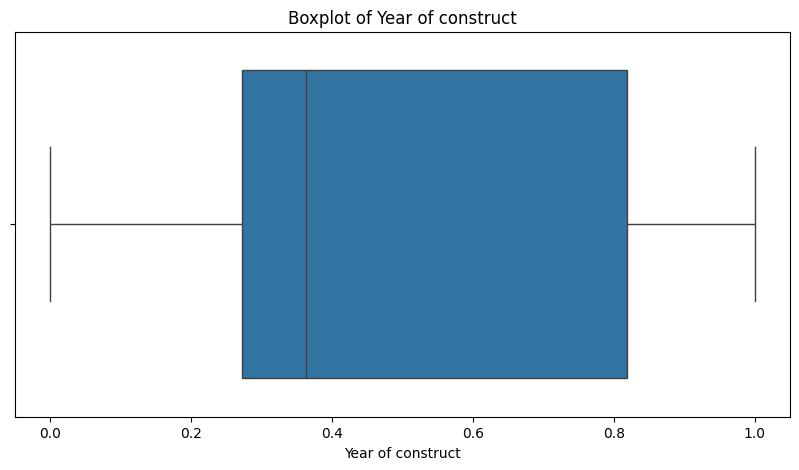

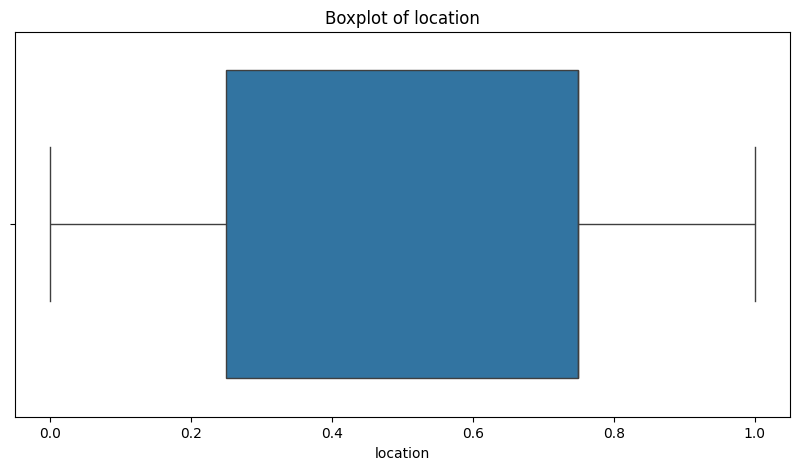

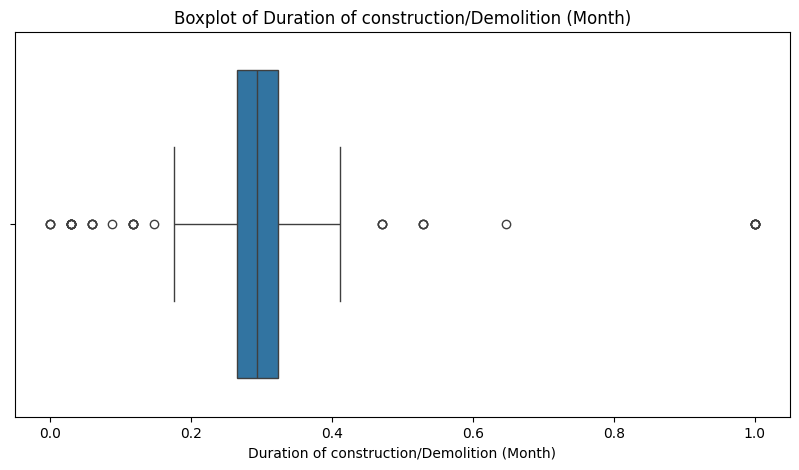

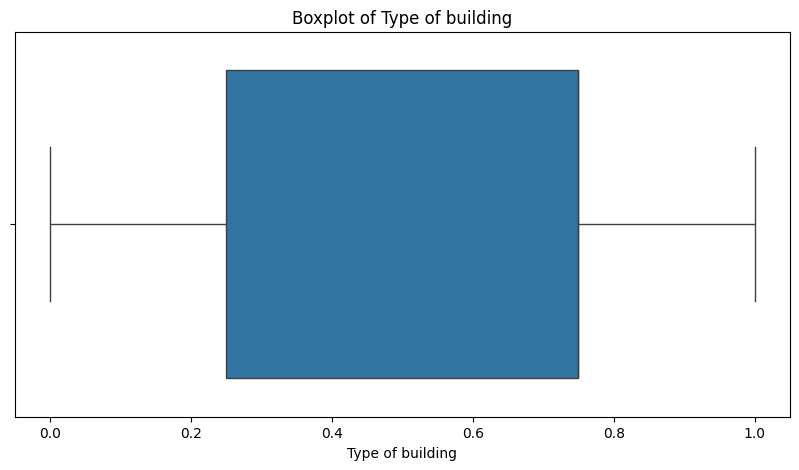

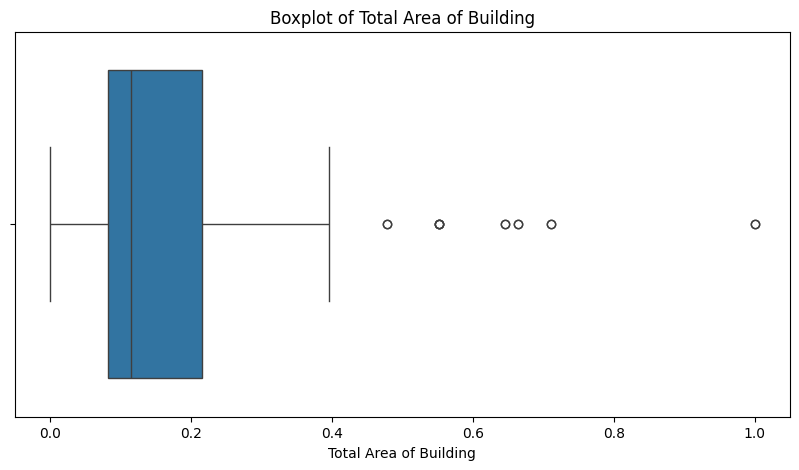

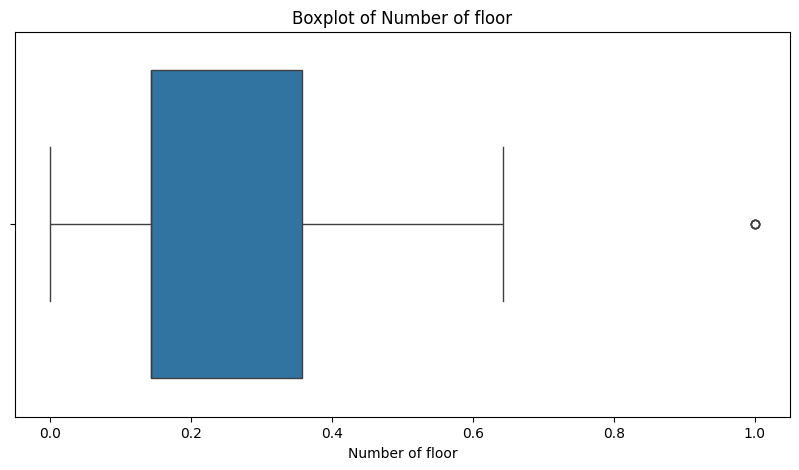

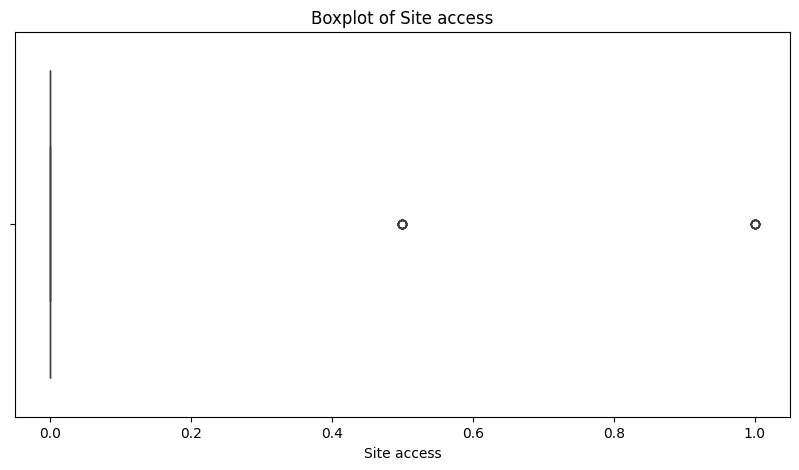

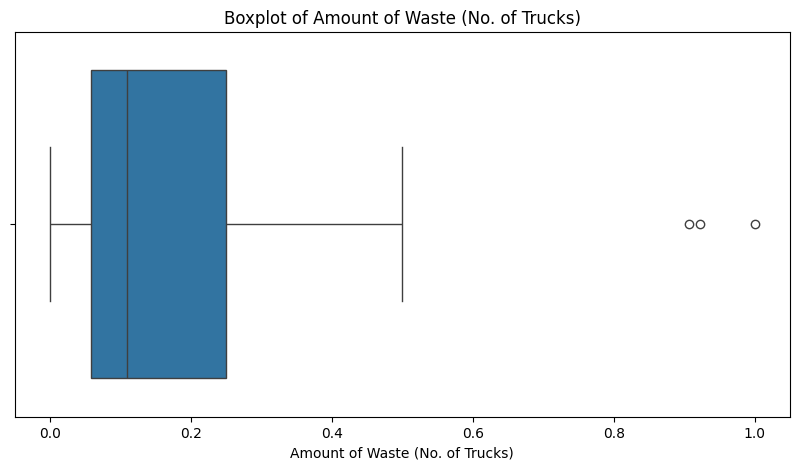

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Data Analysis and Problem Identification

data_cleaned = data_all

# Convert relevant columns to numeric, coercing errors to NaN
numeric_columns = data.columns.values.tolist()

for col in numeric_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Display basic information about the cleaned dataset
data_cleaned.info()

# Check for missing values
missing_values = data_cleaned.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Display summary statistics for numerical columns
summary_stats = data_cleaned.describe()
print("\nSummary Statistics:\n", summary_stats)

# # Check for unique values and distributions in categorical columns
# categorical_columns = ['Construction (1) / Demolition (2)', 'Year of construct', 'location',
#                        'Type of building', 'Number of floor', 'Site access']
# for col in categorical_columns:
#     print(f"\nUnique values in {col}:\n", data_cleaned[col].value_counts())

# Plot distributions of numerical columns to identify outliers
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# RELEVANT FUNCTION

In [5]:
def make_r_plot(y_test_tensor,y_pred):
  plt.figure(figsize=(6, 6))
  plt.scatter(y_test_tensor, y_pred, c='crimson')
  # try:
  coeff = np.polyfit(y_test_tensor, y_pred, 1)
  slope, intercept = coeff
  reg_line = slope * y_test_tensor + intercept
  plt.plot(y_test_tensor, reg_line, 'b-')
  # Add the equation of the regression line
  # print(slope,intercept)
  equation = f'Regression Line: y = {slope:.2f}x + {intercept:.2f}'
  plt.text(0.05, 0.85, equation, fontsize=8, transform=plt.gca().transAxes)
  # Calculate R² using r2_score on the actual and predicted values
  r_squared = r2_score(y_test_tensor, y_pred)
  # Place the R² text after calculating it
  plt.text(0.05, 0.9, 'R²: {:.2f}'.format(r_squared), fontsize=9,
  transform=plt.gca().transAxes)
  # except Exception as e:
  #   print(f"Error in regression line fitting: {e}")

  plt.xlabel('Actual EAC', fontsize=9)
  plt.ylabel('Predicted EAC', fontsize=9)
  plt.axis('equal')
  plt.show()

# Plotting the training loss curve
def pltloss(mlp):
  plt.figure(figsize=(10, 6))
  plt.plot(mlp.loss_curve_)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training Loss Curve')
  plt.show()


def plotbar(ranked_features, feature_names):
  plt.figure(figsize=(10, 6))
  plt.bar(range(len(ranked_features)), [feature_importance[feature] for feature in ranked_features])
  plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=90)
  plt.xlabel('Features')
  plt.ylabel('MSE')
  plt.title('Feature Importance (MSE)')
  plt.show()


def combine_input_variables(combination_num, ranked_features,X,y,model_name):
  if int(combination_num) <= int(len(ranked_features)):
    combinations = list(itertools.combinations(ranked_features , combination_num))
    # Initialize results DataFrame
    results = pd.DataFrame(columns=['Features', 'Test Loss', 'MAE', 'MSE', 'RMSE', 'SI', 'R-Value'])
    r_max = 0
    model_to_save = None
    for comb in combinations:
      # Evaluate the model with the selected and ranked features
      X_selected = X[:, comb]
      X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

      # Standardize the features
      # scaler = StandardScaler()
      # X_train = scaler.fit_transform(X_train)
      # X_test = scaler.transform(X_test)

      # Train the MLP regressor
      mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
      mlp.fit(X_train, y_train)
      y_pred = mlp.predict(X_test)

      # Calculate metrics
      mae = mean_absolute_error(y_test, y_pred)
      mse = mean_squared_error(y_test, y_pred)
      rmse = np.sqrt(mse)
      r_value = r2_score(y_test, y_pred)
      si = rmse / np.mean(y_test)
      test_loss = mlp.loss_
      if r_value > 0.1:
        pltloss(mlp)
        make_r_plot(y_test,y_pred)
        feature_important_names = [feature_names[f] for f in comb]

        # Append results using pd.concat
        new_row = pd.DataFrame({
            'Model':[str(combination_num) +'-'+ model_name],
            'Features': [feature_important_names],
            'Test Loss': [test_loss],
            'MAE': [mae],
            'MSE': [mse],
            'RMSE': [rmse],
            'SI': [si],
            'R-Value': [r_value]
        })
        if r_value > r_max:
          r_max = r_value
          model_to_save = new_row

        results = pd.concat([results, new_row], ignore_index=True)


        print("y_test: ", y_test)
        print("y_pred: ", y_pred)
    display(results)
    return results, model_to_save
  else:
    print("Number of combination is greater than the size of the ranked features")
    return None, None



# CLASS GREY WOLF OPTIMIZAION CODE

`This code implements a feature selection algorithm using the Grey Wolf Optimizer. It evaluates the fitness of each solution (wolf) by training an MLP regressor and calculating the mean squared error. The positions of the wolves are updated iteratively based on the social hierarchy and hunting behavior of grey wolves, with the aim of finding the subset of features that minimizes the MSE.`



```
num_features: Number of features in the dataset.
num_wolves: Number of wolves (solutions) in the population.
max_iter: Maximum number of iterations for the optimization process.
alpha_pos, beta_pos, delta_pos: Positions of the top three wolves (solutions) based on their fitness scores.
alpha_score, beta_score, delta_score: Fitness scores of the top three wolves.
population: Initial population of wolves, each represented by a binary vector indicating selected features.
fitness: Evaluates the fitness of a wolf (solution).
selected_features: Array of indices of selected features.
train_test_split: Splits the data into training and testing sets.
StandardScaler: Standardizes the features.
MLPRegressor: Trains an MLP regressor on the training data.
mean_squared_error: Calculates the mean squared error (MSE) between the actual and predicted labels.

update_position: Updates the position of a wolf based on the positions of the top three wolves (alpha, beta, delta).
a, A1, A2, A3, C1, C2, C3: Coefficients for updating the positions based on the current iteration.
D_alpha, D_beta, D_delta: Distances between the current wolf and the top three wolves.
X1, X2, X3: New positions calculated based on the distances.
```



Initialization:

> The GWO class initializes the population of wolves, their positions, and the alpha, beta, delta positions and scores.



Fitness Function:
> ANN to evaluate the fitness of feature subsets, leveraging the power of neural networks to potentially provide more accurate fitness evaluations for complex datasets.




Update Position:
> Wolves update their positions based on the positions of the alpha, beta, and delta wolves.


Binarization:
> Continuous position values are binarized to determine selected features.


Optimization Loop:
> The main loop of the GWO algorithm, iterating through each wolf and updating their positions based on their fitness. For each iteration, the fitness of each wolf is calculated, and the top three wolves (alpha, beta, delta) are updated based on their fitness scores. Positions of all wolves are updated based on the positions of the top three wolves. The binary positions of the best features (alpha wolf) are returned after the final iteration.

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
import itertools
from sklearn.metrics import r2_score
from sklearn.exceptions import ConvergenceWarning

# Ignore convergence warnings for simplicity
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

# Define the Grey Wolf Optimizer class
class GWO:
    def __init__(self, num_features, num_wolves=5, max_iter=20):
        self.num_features = num_features
        self.num_wolves = num_wolves
        self.max_iter = max_iter
        # self.test_size = test_size
        self.alpha_pos = np.zeros(num_features)
        self.beta_pos = np.zeros(num_features)
        self.delta_pos = np.zeros(num_features)
        self.alpha_score = float("inf")
        self.beta_score = float("inf")
        self.delta_score = float("inf")
        self.population = np.random.randint(2, size=(num_wolves, num_features))

    def fitness(self, wolf, data, labels,test_size):
        selected_features = np.where(wolf == 1)[0]
        if selected_features.size == 0:
            return float("inf")
        X_selected = data[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, labels, test_size=test_size, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Train the regressor
        regressor = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        return mse

    def update_position(self, wolf):
        a = 2 * (1 - (self.iteration / self.max_iter))
        r1, r2 = np.random.random(2)
        A1 = 2 * a * r1 - a
        C1 = 2 * r2
        D_alpha = abs(C1 * self.alpha_pos - wolf)
        X1 = self.alpha_pos - A1 * D_alpha

        r1, r2 = np.random.random(2)
        A2 = 2 * a * r1 - a
        C2 = 2 * r2
        D_beta = abs(C2 * self.beta_pos - wolf)
        X2 = self.beta_pos - A2 * D_beta

        r1, r2 = np.random.random(2)
        A3 = 2 * a * r1 - a
        C3 = 2 * r2
        D_delta = abs(C3 * self.delta_pos - wolf)
        X3 = self.delta_pos - A3 * D_delta

        new_wolf = (X1 + X2 + X3) / 3
        return np.clip(new_wolf, 0, 1)

    def binarize(self, wolf):
        return (wolf > 0.5).astype(int)

    def optimize(self, data, labels,test_size):
        for self.iteration in range(self.max_iter):
            for i in range(self.num_wolves):
                fitness = self.fitness(self.population[i], data, labels,test_size)
                if fitness < self.alpha_score:
                    self.delta_score = self.beta_score
                    self.delta_pos = self.beta_pos.copy()
                    self.beta_score = self.alpha_score
                    self.beta_pos = self.alpha_pos.copy()
                    self.alpha_score = fitness
                    self.alpha_pos = self.population[i].copy()
                elif fitness < self.beta_score:
                    self.delta_score = self.beta_score
                    self.delta_pos = self.beta_pos.copy()
                    self.beta_score = fitness
                    self.beta_pos = self.population[i].copy()
                elif fitness < self.delta_score:
                    self.delta_score = fitness
                    self.delta_pos = self.population[i].copy()

            for i in range(self.num_wolves):
                new_wolf = self.update_position(self.population[i])
                self.population[i] = self.binarize(new_wolf)

        return np.where(self.alpha_pos == 1)[0]



In [7]:
import pandas as pd
all_results = pd.DataFrame(columns=['Model','Features', 'Test Loss', 'MAE', 'MSE', 'RMSE', 'SI', 'R-Value'])


# 70-30 DATA SPLIT

Selected features: [6]
Ranked features by importance: [6]


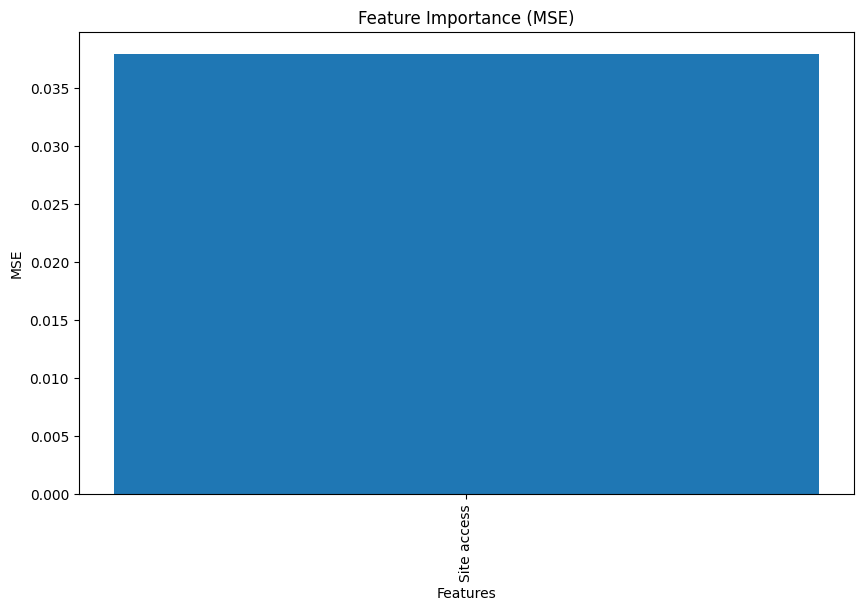

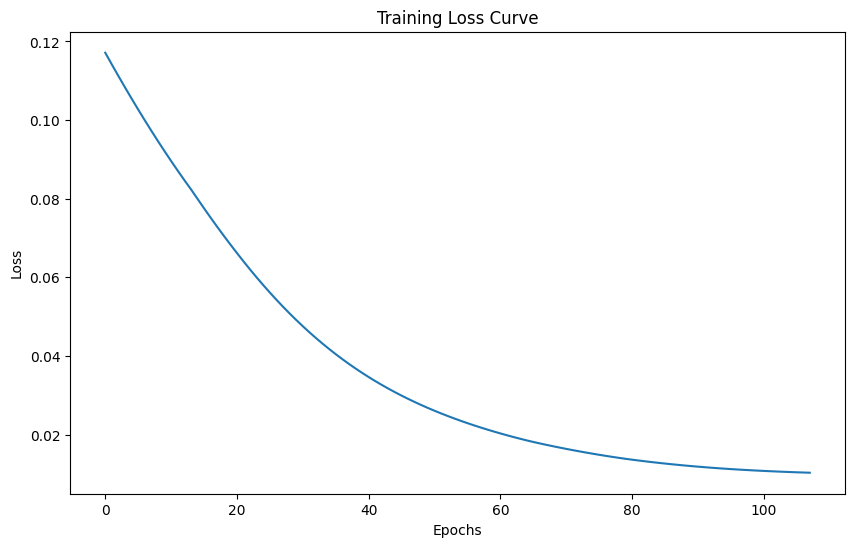

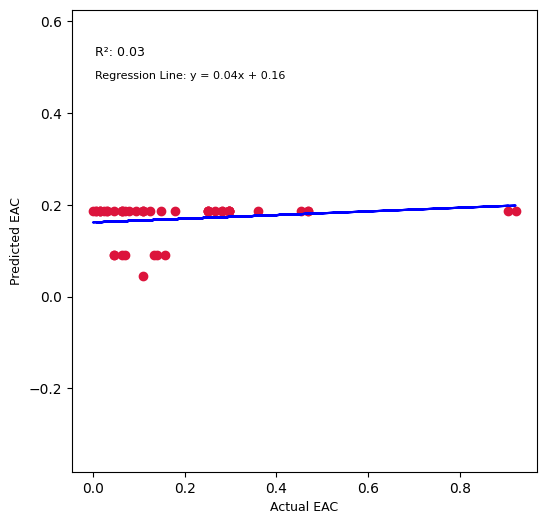

,Model,Features,Test Loss,MAE,MSE,RMSE,SI,R-Value
0,70-30 Split,[Site access],0.010278,0.137228,0.037962,0.194839,1.031977,0.03253


y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [0.08999291 0.08999291 0.18626296 0.18626296 0.08999291 0.18626296
 0.18626296 0.18626296 0.18626296 0.18626296 0.18626296 0.18626296
 0.08999291 0.18626296 0.18626296 0.18626296 0.18626296 0.18626296
 0.18626296 0.08999291 0.18626296 0.18626296 0.18626296 0.18626296
 0.18626296 0.18626296 0.08999291 0.18626296 0.18626296 0.18626296
 0.18626296 0.18626296 0.18626296 0.18626296 0.18626296 0.18626296
 0.18626296 0.04499566 0.18626296 0.18626296 0.18626296 0.18626296
 0.18626296 0.08999291 0.18626296 0.

In [8]:
# Load your dataset from an Excel file
# Assuming the last column is the label
X = data_all.iloc[:, :-1].values

y = data_all.iloc[:, -1].values

feature_names = data_all.columns.values.tolist()
# Ensure y is of numeric type
y = y.astype(float)

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X1 = X
y1 = y
# Normalize the features

# X = scaler.fit_transform(X)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

num_features = X.shape[1]
test_size=0.3
gwo = GWO(num_features, num_wolves=10, max_iter=30)
selected_features = gwo.optimize(X, y,test_size)
print("Selected features:", selected_features)

# Evaluate and rank the importance of each selected feature
feature_importance = {}
for feature in selected_features:
    X_selected = X[:, [feature]]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    # Calculate MSE for the feature
    mse = mean_squared_error(y_test, y_pred)
    feature_importance[feature] = mse

# Rank features by importance (MSE)
ranked_features = sorted(feature_importance, key=feature_importance.get)
ranked_features1 = ranked_features
print("Ranked features by importance:", ranked_features)

plotbar(ranked_features, feature_names)



# Initialize results DataFrame
results = pd.DataFrame(columns=['Model','Features', 'Test Loss', 'MAE', 'MSE', 'RMSE', 'SI', 'R-Value'])




# Evaluate the model with the selected and ranked features
X_selected = X[:, ranked_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the MLP regressor
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)


pltloss(mlp)
make_r_plot(y_test,y_pred)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_value = r2_score(y_test, y_pred)
si = rmse / np.mean(y_test)
test_loss = mlp.loss_

feature_important_names = [feature_names[f] for f in feature_importance]

# Append results using pd.concat
new_row = pd.DataFrame({
    'Model': ['70-30 Split'],
    'Features': [feature_important_names],
    'Test Loss': [test_loss],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'SI': [si],
    'R-Value': [r_value]
})
results = pd.concat([results, new_row], ignore_index=True)
all_results = pd.concat([all_results, new_row], ignore_index=True)

display(results)
print("y_test: ", y_test)
print("y_pred: ", y_pred)


# Print the performance metrics
print("\nModel Performance Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"SI: {si}")
print(f"R-Value: {r_value}")
print(f"Test Loss: {test_loss}")


## From the best input, combine two variables together........

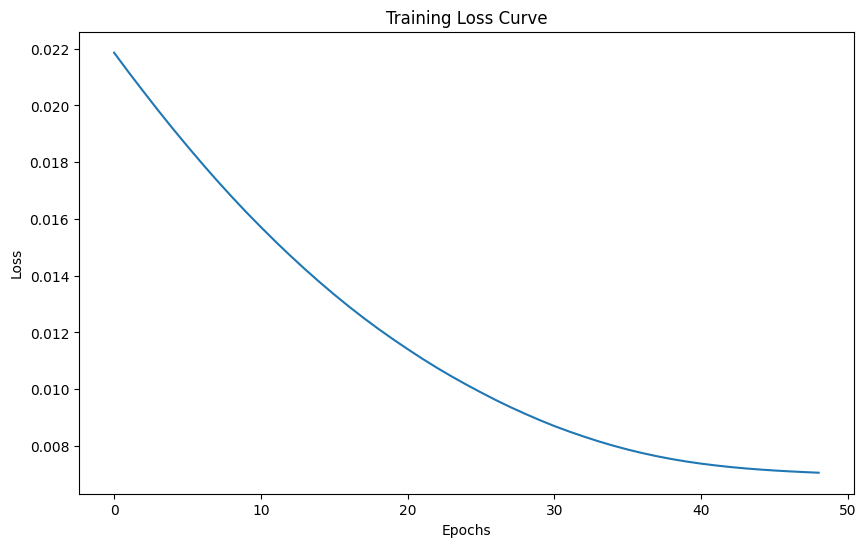

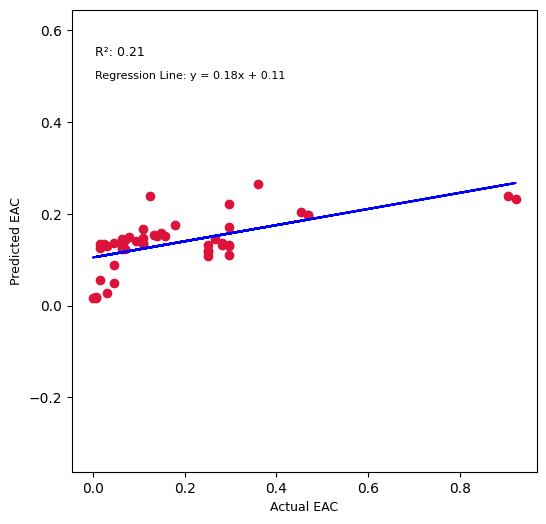

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [0.08762839 0.13745274 0.14446875 0.13318846 0.12337378 0.13588323
 0.14271475 0.05493727 0.26628813 0.13084979 0.22164668 0.01554357
 0.15072847 0.10781006 0.1986126  0.13353771 0.14642927 0.11868273
 0.2396635  0.15072847 0.04960791 0.23266562 0.13459166 0.13178525
 0.17506315 0.13394474 0.12337378 0.13318846 0.12655059 0.1986126
 0.1370746  0.23865385 0.13318846 0.14616806 0.13049899 0.02740122
 0.01919188 0.16750665 0.11093742 0.15742101 0.2045221  0.17098276
 0.13438513 0.15461461 0.11868273 0.1

,Features,Test Loss,MAE,MSE,RMSE,SI,R-Value,Model
0,"[Total Area of Building, Duration of construct...",0.007056,0.112133,0.031004,0.176078,0.932607,0.209877,2-70-30 model


In [9]:
pt, mds = combine_input_variables(2, ranked_features1,X1,y1,'70-30 model')
all_results = pd.concat([all_results, mds], ignore_index=True)

## From the best input, combine three variables together........

In [10]:
pt, mds = combine_input_variables(3, ranked_features1,X1,y1, '70-30 model')
all_results = pd.concat([all_results, mds], ignore_index=True)

,Features,Test Loss,MAE,MSE,RMSE,SI,R-Value


## From the best input, combine four variables together........

In [11]:
pt, mds = combine_input_variables(4, ranked_features1,X1,y1, '70-30 model')
all_results = pd.concat([all_results, mds], ignore_index=True)

Number of combination is greater than the size of the ranked features


# 80-20 Split

Selected features: [0 2 3 4 5 6]
Ranked features by importance: [4, 2, 6, 3, 5, 0]


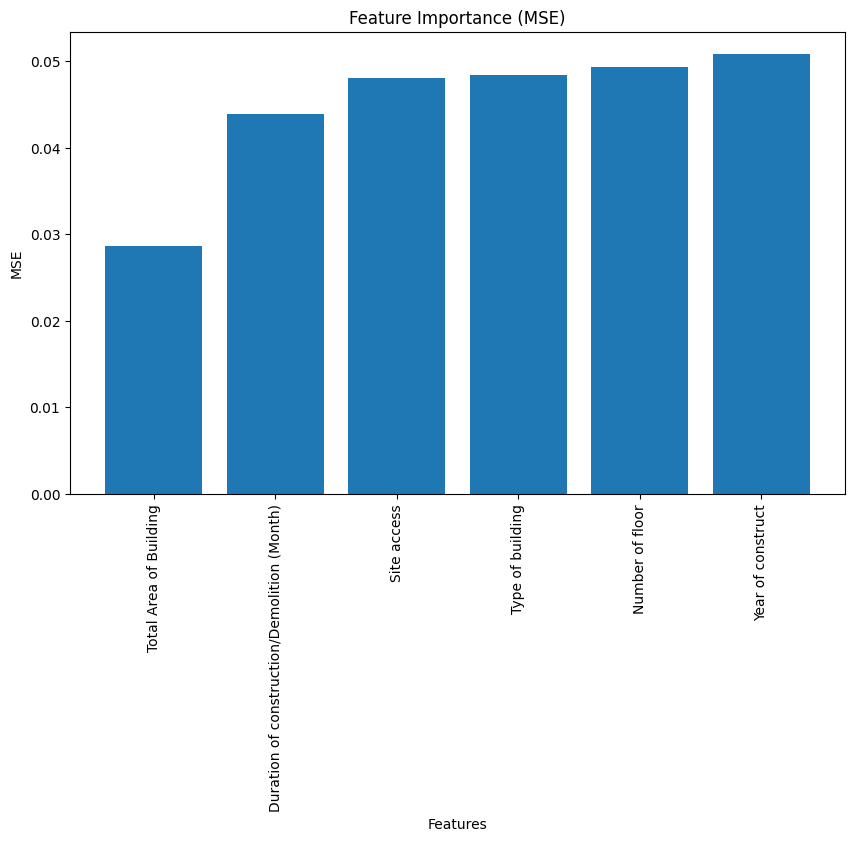

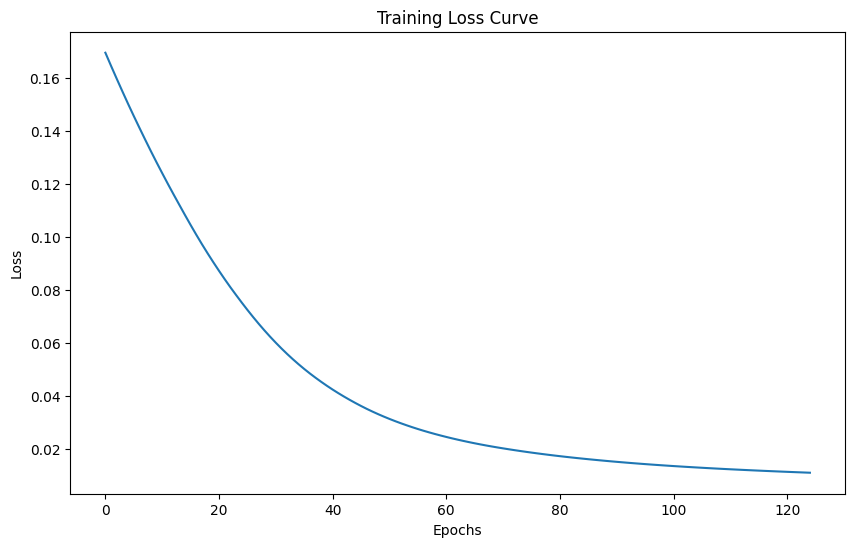

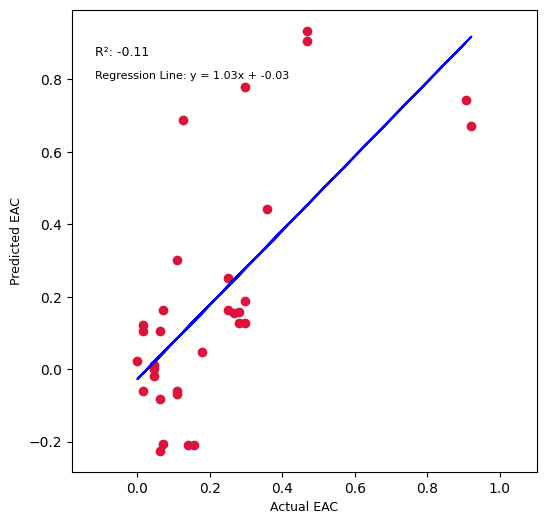

,Features,Test Loss,MAE,MSE,RMSE,SI,R-Value,Model
0,"[Year of construct, Duration of construction/D...",0.01115,0.183496,0.054619,0.233707,1.101568,-0.110084,80-20 Model


y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125    ]
y_pred:  [ 1.09184476e-02 -1.84297760e-02  1.56274800e-01  1.27566592e-01
 -2.06725981e-01 -6.94465881e-02  1.63884574e-01 -5.93225201e-02
  4.43318159e-01  1.89603814e-01  7.80140437e-01  2.14474721e-02
 -2.09210106e-01  2.52385284e-01  9.34487835e-01 -6.05514613e-02
  3.01363216e-01  1.64104890e-01  7.43406127e-01 -2.09210106e-01
 -9.93418391e-06  6.72028551e-01 -8.25792532e-02  1.05555094e-01
  4.76456758e-02  1.04864288e-01 -2.25097000e-01  1.27566592e-01
  1.22890479e-01  9.04963103e-01  1.57750338e-01  6.88182609e-01]

Model Performance Metrics:
MAE: 0.1834964670891533
MSE: 0.054618766356281725
RMSE: 0.2337065817564446
SI: 1.1015675015815847
R-Value: -0.11008

In [12]:
# Load your dataset from an Excel file
# Assuming the last column is the label
X = data_all.iloc[:, :-1].values

y = data_all.iloc[:, -1].values

feature_names = data_all.columns.values.tolist()
# Ensure y is of numeric type
y = y.astype(float)

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X2 = X
y2 = y
# Normalize the features

# X = scaler.fit_transform(X)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

num_features = X.shape[1]
test_size = 0.2
gwo = GWO(num_features, num_wolves=10, max_iter=30)
selected_features = gwo.optimize(X, y,test_size)
print("Selected features:", selected_features)

# Evaluate and rank the importance of each selected feature
feature_importance = {}
for feature in selected_features:
    X_selected = X[:, [feature]]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    # Calculate MSE for the feature
    mse = mean_squared_error(y_test, y_pred)
    feature_importance[feature] = mse

# Rank features by importance (MSE)
ranked_features = sorted(feature_importance, key=feature_importance.get)
ranked_features2 = ranked_features
print("Ranked features by importance:", ranked_features)

plotbar(ranked_features, feature_names)



# Initialize results DataFrame
results = pd.DataFrame(columns=['Features', 'Test Loss', 'MAE', 'MSE', 'RMSE', 'SI', 'R-Value'])




# Evaluate the model with the selected and ranked features
X_selected = X[:, ranked_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the MLP regressor
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)


pltloss(mlp)
make_r_plot(y_test,y_pred)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_value = r2_score(y_test, y_pred)
si = rmse / np.mean(y_test)
test_loss = mlp.loss_

feature_important_names = [feature_names[f] for f in feature_importance]

# Append results using pd.concat
new_row = pd.DataFrame({
    'Model': ['80-20 Model'],
    'Features': [feature_important_names],
    'Test Loss': [test_loss],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'SI': [si],
    'R-Value': [r_value]
})
results = pd.concat([results, new_row], ignore_index=True)
all_results = pd.concat([all_results, new_row], ignore_index=True)

display(results)
print("y_test: ", y_test)
print("y_pred: ", y_pred)


# Print the performance metrics
print("\nModel Performance Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"SI: {si}")
print(f"R-Value: {r_value}")
print(f"Test Loss: {test_loss}")


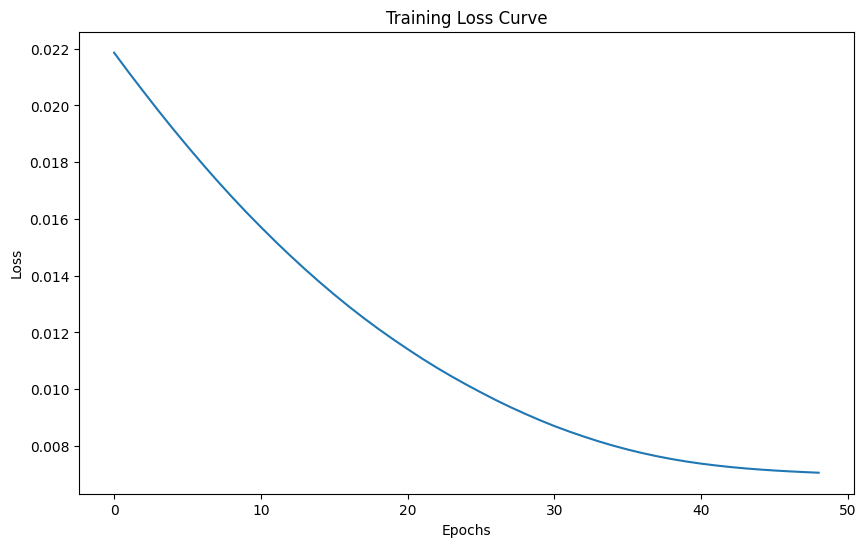

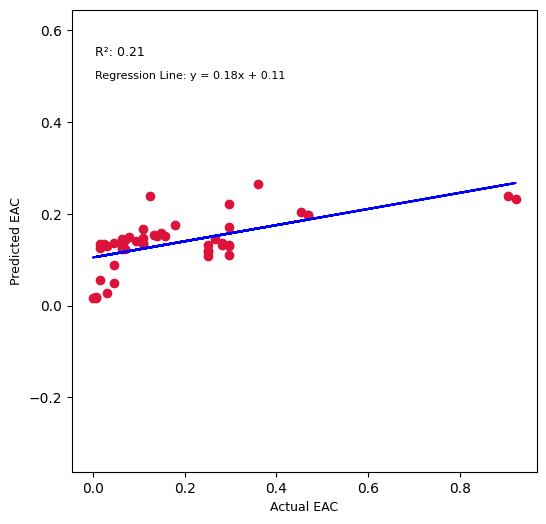

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [0.08762839 0.13745274 0.14446875 0.13318846 0.12337378 0.13588323
 0.14271475 0.05493727 0.26628813 0.13084979 0.22164668 0.01554357
 0.15072847 0.10781006 0.1986126  0.13353771 0.14642927 0.11868273
 0.2396635  0.15072847 0.04960791 0.23266562 0.13459166 0.13178525
 0.17506315 0.13394474 0.12337378 0.13318846 0.12655059 0.1986126
 0.1370746  0.23865385 0.13318846 0.14616806 0.13049899 0.02740122
 0.01919188 0.16750665 0.11093742 0.15742101 0.2045221  0.17098276
 0.13438513 0.15461461 0.11868273 0.1

,Features,Test Loss,MAE,MSE,RMSE,SI,R-Value,Model
0,"[Total Area of Building, Duration of construct...",0.007056,0.112133,0.031004,0.176078,0.932607,0.209877,2-80-20 model


In [13]:
# combine_input_variables(2, ranked_features2,X2,y2)
pt, mds = combine_input_variables(2, ranked_features2,X2,y2, '80-20 model')
all_results = pd.concat([all_results, mds], ignore_index=True)

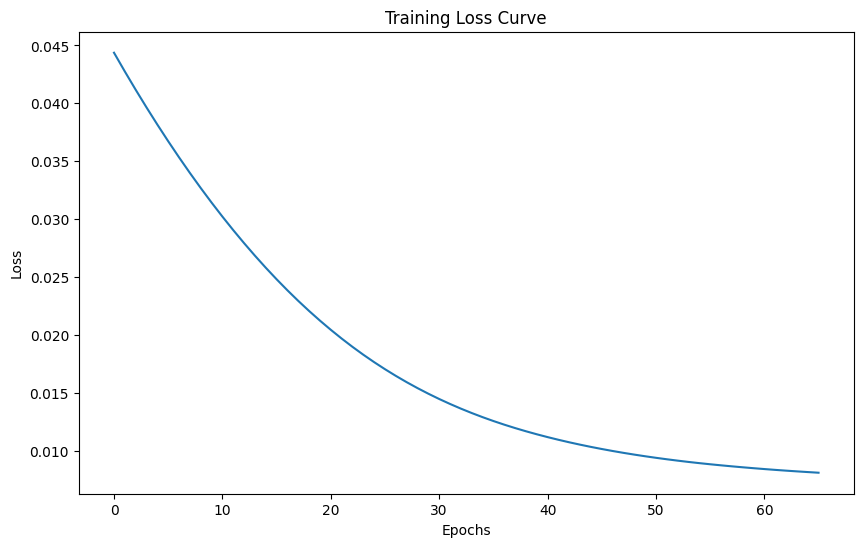

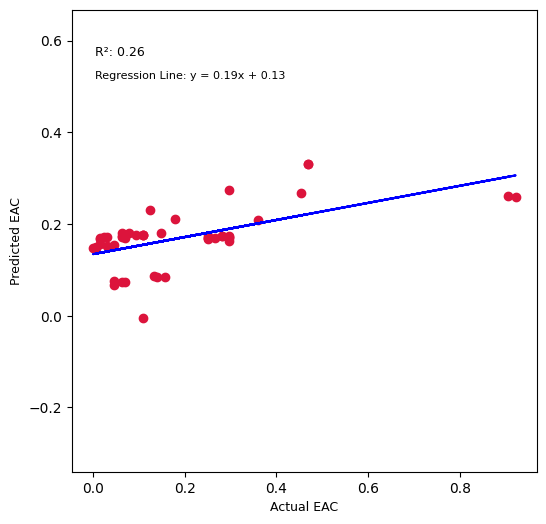

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [ 0.06639272  0.07687974  0.17031015  0.17302179  0.07322391  0.17624871
  0.16983302  0.15618402  0.20951048  0.17175164  0.27465158  0.14755556
  0.08460372  0.1674092   0.33151141  0.17529609  0.17557798  0.16926288
  0.26134727  0.08460372  0.15396126  0.25814917  0.17378388  0.1722597
  0.2109235   0.16744738  0.07322391  0.17302179  0.1691598   0.33151141
  0.1730333   0.23018038  0.17302179  0.18007112  0.17156112  0.15268697
  0.14935282 -0.00413189  0.16867935  0.18058052  0.26737053  0.1633

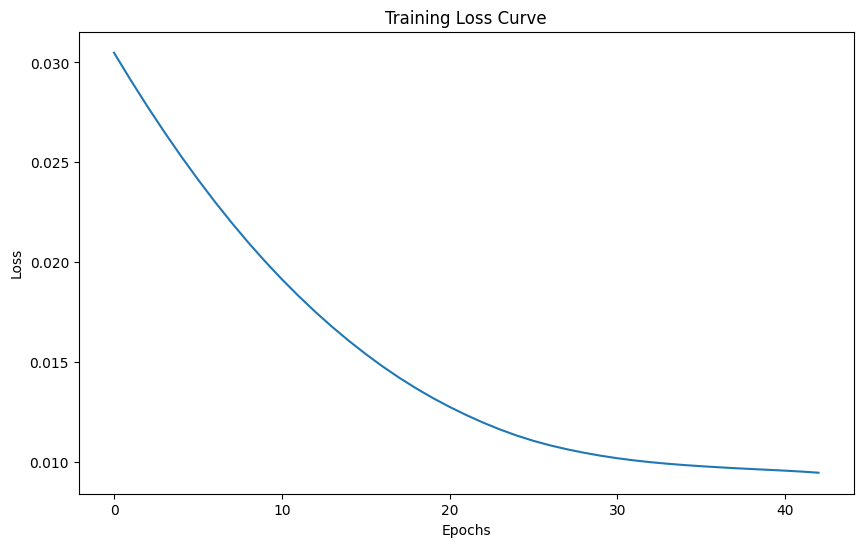

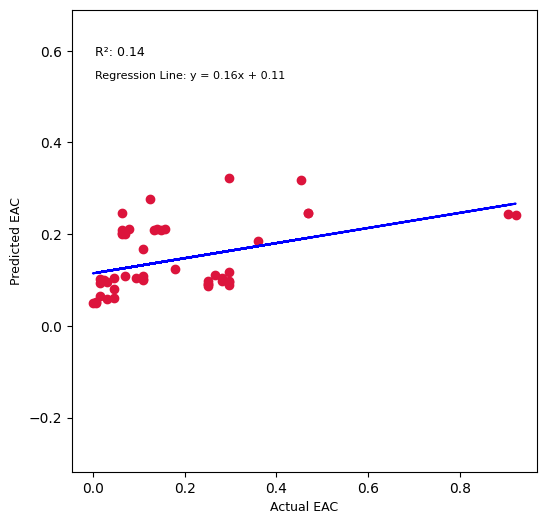

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [0.08021562 0.10506961 0.1100733  0.09859909 0.19987096 0.10220438
 0.10940061 0.06516272 0.18417084 0.09652655 0.32210012 0.04928055
 0.21048854 0.08591094 0.24535843 0.10054519 0.10920094 0.09070061
 0.2430994  0.21048854 0.06102866 0.24160125 0.20230035 0.24520871
 0.12442397 0.1019608  0.19987096 0.09859909 0.09406231 0.24535843
 0.10338876 0.27664745 0.09859909 0.20817448 0.09621567 0.05882432
 0.05262323 0.16832141 0.08818156 0.20924129 0.31706956 0.11690646
 0.10100533 0.20859894 0.09070061 0.

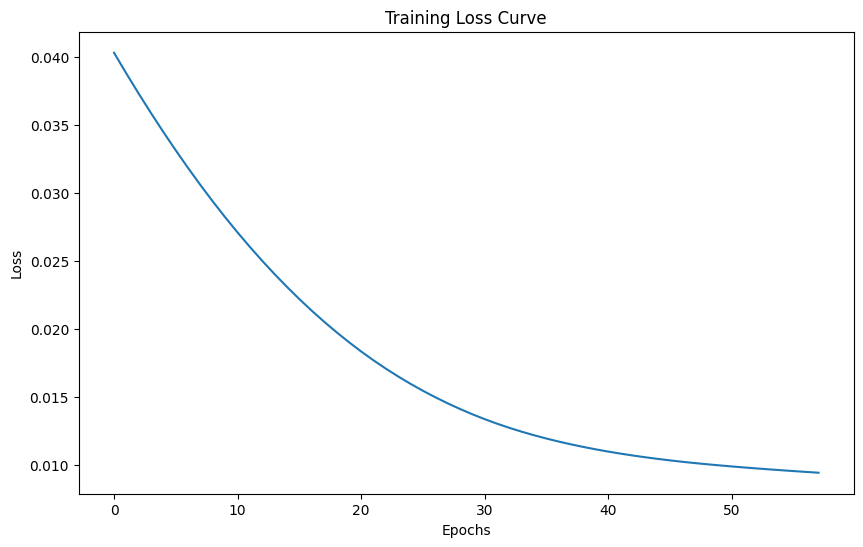

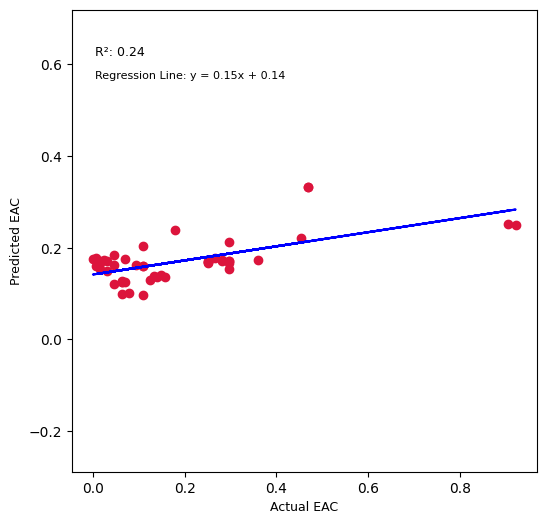

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [0.16282344 0.18520977 0.17690199 0.17216112 0.12452929 0.16071553
 0.17628582 0.15384326 0.17430401 0.17072401 0.21331412 0.17488501
 0.13728277 0.16605517 0.33353529 0.1596377  0.20418096 0.16803031
 0.25262902 0.13728277 0.12089052 0.24992044 0.1273667  0.12564216
 0.23980039 0.17180007 0.12452929 0.17216112 0.16766926 0.33353529
 0.17413626 0.12993767 0.17216112 0.09807485 0.17050844 0.15025315
 0.17691852 0.09715353 0.16749228 0.14098245 0.22154609 0.15425778
 0.17248358 0.13925791 0.16803031 0.

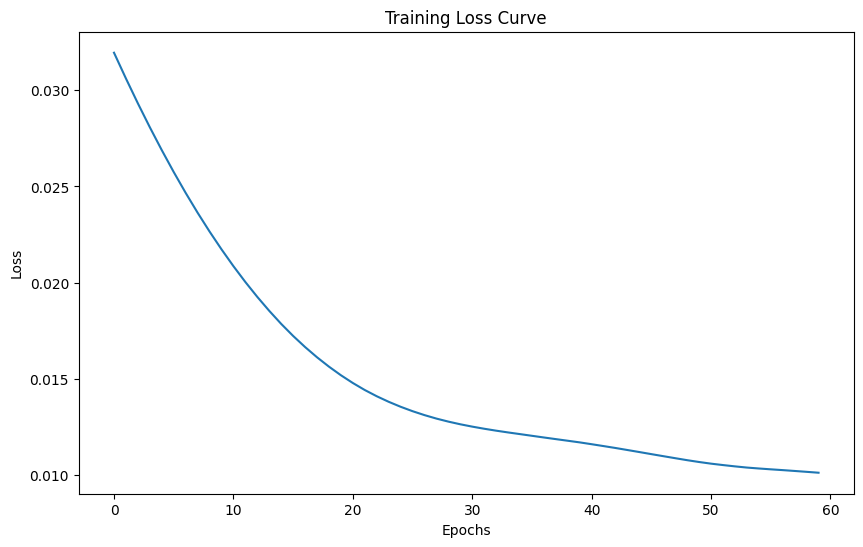

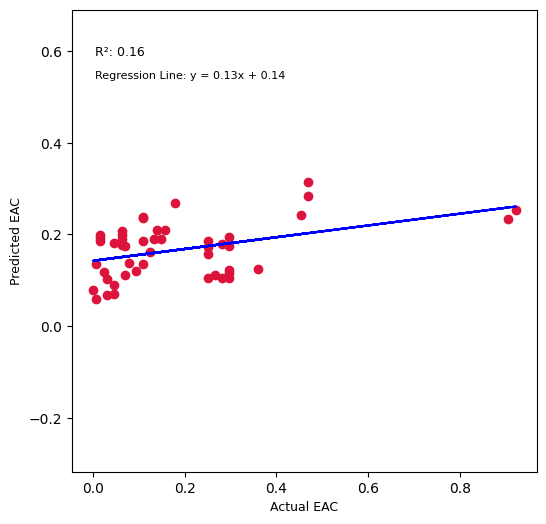

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [0.09026452 0.18110797 0.11250198 0.1053938  0.17494964 0.23771394
 0.11160119 0.19846337 0.12402282 0.11622761 0.19389754 0.07790318
 0.21071902 0.15845991 0.31444811 0.23654665 0.18506044 0.18518293
 0.23415751 0.21071902 0.07115902 0.25305976 0.19035843 0.17688231
 0.26975431 0.19134125 0.19901936 0.1053938  0.18688638 0.28352659
 0.18025624 0.16101668 0.1053938  0.20833848 0.1040126  0.06719815
 0.13508261 0.13514413 0.12355639 0.19070537 0.24184039 0.17440629
 0.11870075 0.18926411 0.17314807 0.

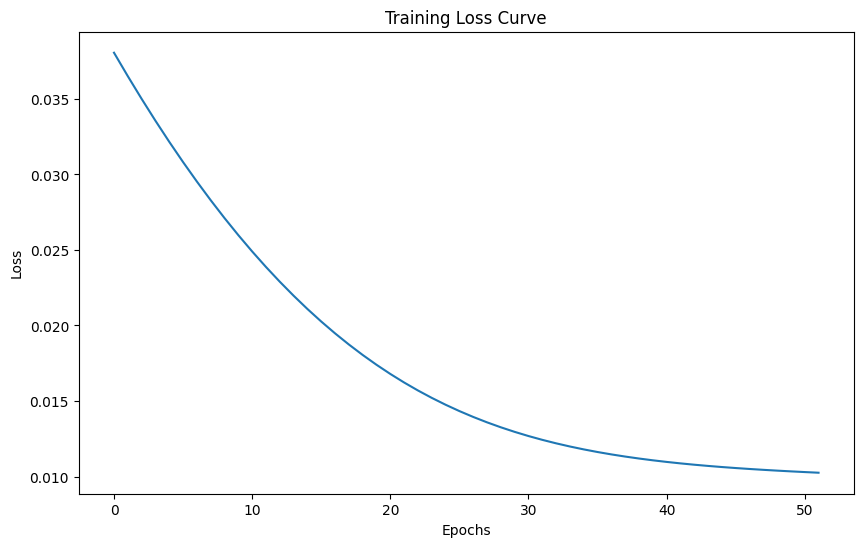

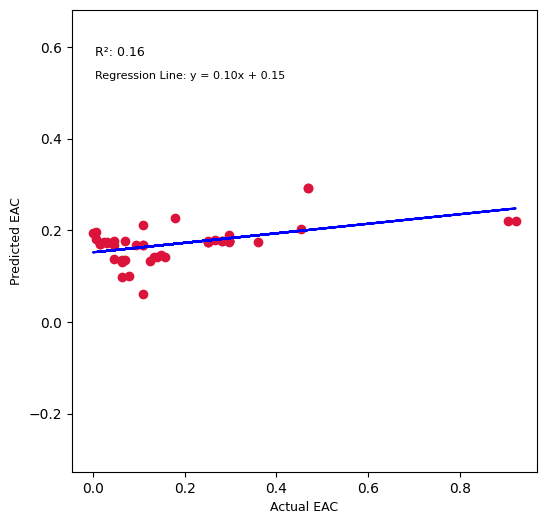

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [0.16697534 0.17723603 0.17859717 0.17627212 0.13579744 0.16788846
 0.17743465 0.16929698 0.17331357 0.17472209 0.19064695 0.19472124
 0.141735   0.17394708 0.29288798 0.16672594 0.21163984 0.17394708
 0.22000942 0.141735   0.13741684 0.22000942 0.13345077 0.13159073
 0.2273907  0.17162203 0.13579744 0.17627212 0.16929698 0.29288798
 0.17627212 0.13202876 0.17627212 0.09737205 0.17448959 0.17181578
 0.19691453 0.06139491 0.17549711 0.14600603 0.20329321 0.17627212
 0.17448959 0.141735   0.17394708 0.

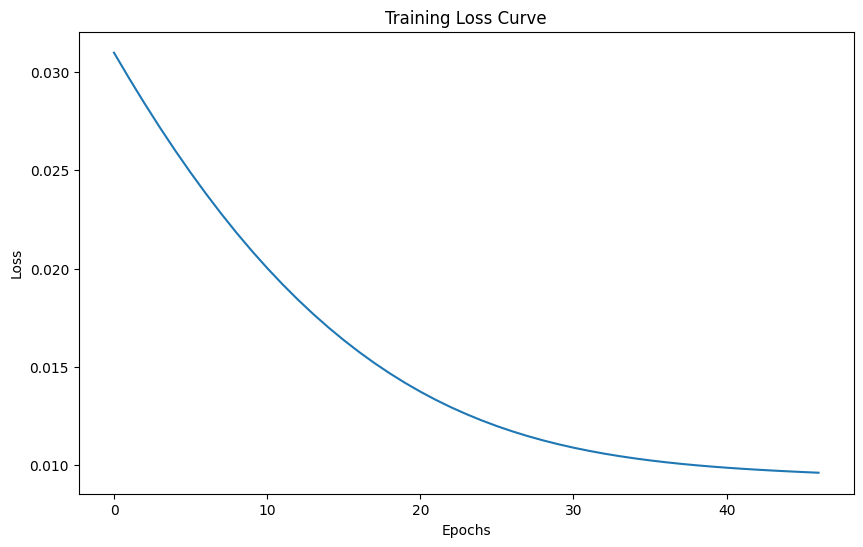

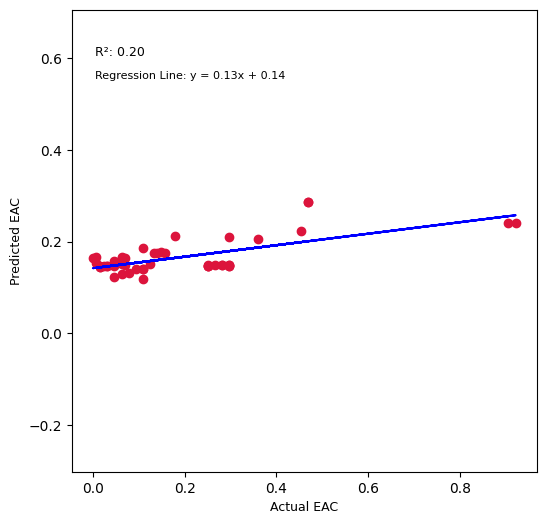

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [0.14739551 0.15779051 0.14924777 0.14813641 0.16439898 0.14033458
 0.14869209 0.14480234 0.2054023  0.14739551 0.20960325 0.16454396
 0.17601782 0.14702506 0.28534155 0.1397789  0.1851118  0.14702506
 0.23951479 0.17601782 0.12197486 0.23951479 0.16532849 0.15057955
 0.21306377 0.1459137  0.16439898 0.14813641 0.14480234 0.28534155
 0.14813641 0.15078438 0.14813641 0.12892021 0.14728437 0.14600631
 0.16559234 0.11828222 0.14776596 0.17787684 0.22235902 0.14813641
 0.14728437 0.17601782 0.14702506 0.

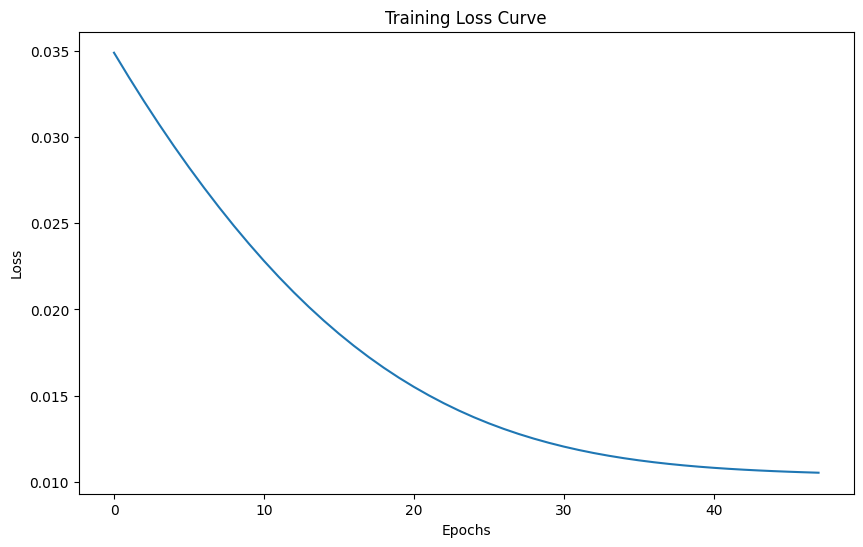

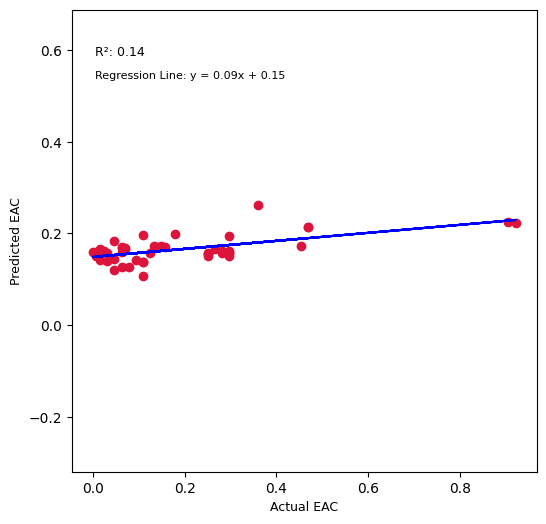

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [0.14372586 0.18293575 0.16599886 0.15848093 0.16865727 0.13778508
 0.16599886 0.14189847 0.26114993 0.15848093 0.16194739 0.16062896
 0.17081817 0.15096301 0.21444831 0.13778508 0.19611368 0.15472197
 0.22476819 0.17081817 0.12042691 0.2229408  0.17081817 0.15978649
 0.19987264 0.16599886 0.16865727 0.15848093 0.1622399  0.21444831
 0.1622399  0.15651688 0.15848093 0.12701751 0.15848093 0.13915739
 0.16062896 0.10726916 0.15096301 0.17297907 0.17222581 0.1948167
 0.1622399  0.17297907 0.15472197 0.1

,Features,Test Loss,MAE,MSE,RMSE,SI,R-Value,Model
0,"[Total Area of Building, Duration of construct...",0.008085,0.121251,0.028910,0.170028,0.900564,0.263239,3-80-20 model
1,"[Total Area of Building, Duration of construct...",0.009466,0.128139,0.033566,0.183211,0.970389,0.144561,3-80-20 model
2,"[Total Area of Building, Duration of construct...",0.009401,0.119028,0.029795,0.172613,0.914255,0.240667,3-80-20 model
3,"[Total Area of Building, Duration of construct...",0.010110,0.132540,0.033091,0.181910,0.963495,0.156671,3-80-20 model
4,"[Total Area of Building, Site access, Number o...",0.010252,0.125516,0.032971,0.181578,0.961738,0.159745,3-80-20 model
5,"[Total Area of Building, Type of building, Num...",0.009614,0.125832,0.031305,0.176932,0.937127,0.202199,3-80-20 model
6,"[Duration of construction/Demolition (Month), ...",0.010521,0.128820,0.033716,0.183618,0.972542,0.140761,3-80-20 model


In [14]:
pt, mds = combine_input_variables(3, ranked_features2,X2,y2,'80-20 model')
all_results = pd.concat([all_results, mds], ignore_index=True)

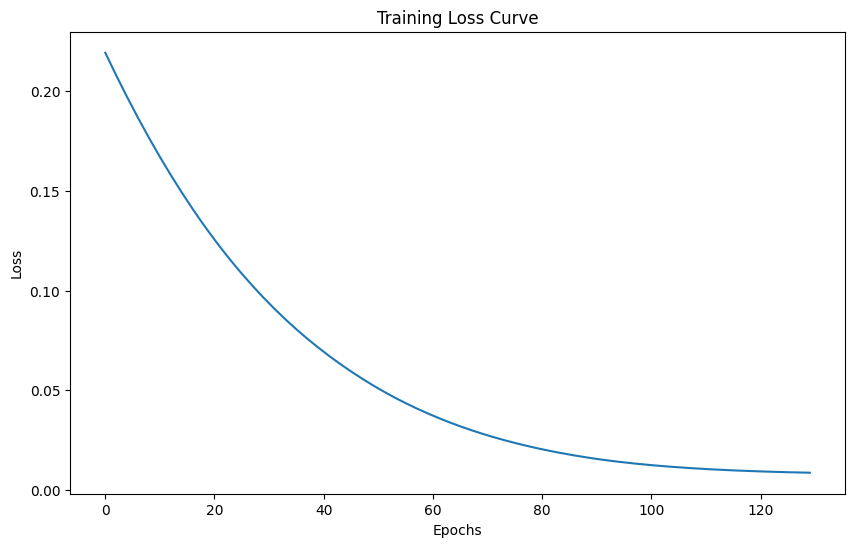

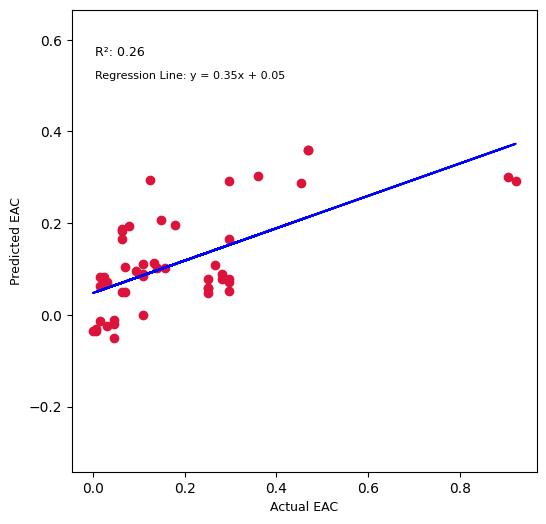

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [-0.04964798 -0.01066788  0.10774798  0.07745586  0.0504181   0.08875998
  0.10357163 -0.01342049  0.30268211  0.0718874   0.29199097 -0.03429655
  0.10315126  0.04716374  0.35968733  0.08458364  0.11069941  0.05813346
  0.30092261  0.10315126 -0.01958986  0.2918301   0.16643937  0.18222905
  0.19684333  0.08268991  0.0504181   0.07745586  0.06336751  0.35968733
  0.08842557  0.29402216  0.07745586  0.18788215  0.07105213 -0.02368429
 -0.03044665 -0.00100911  0.0527322   0.20601729  0.28760467  0.165

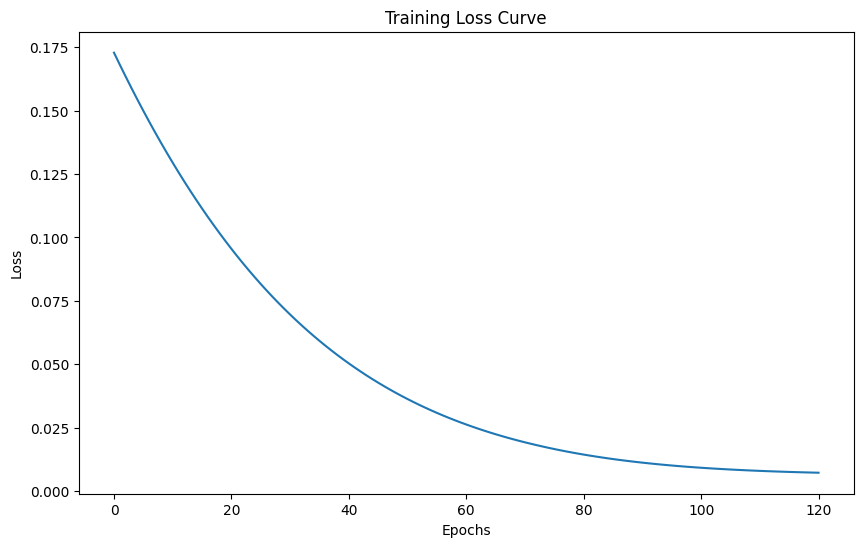

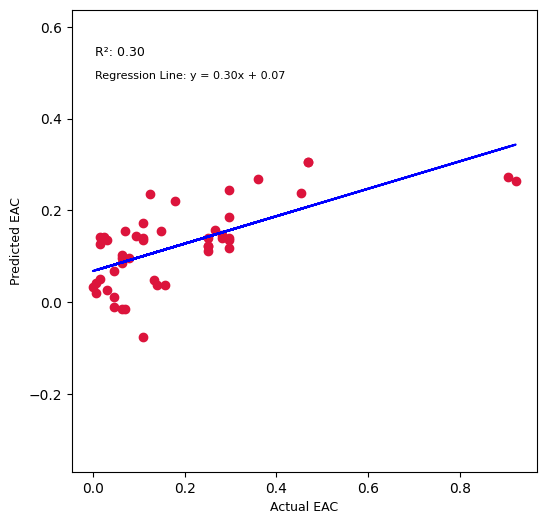

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [-0.01041663  0.06691037  0.15812458  0.13972786 -0.01576413  0.13971161
  0.15543344  0.0510435   0.26734949  0.1356098   0.24465909  0.03303268
  0.03758311  0.11175057  0.30652517  0.13548854  0.17273737  0.12223764
  0.27281721  0.03758311  0.01163781  0.2647076   0.10213166  0.09537474
  0.22003244  0.14197777 -0.01576413  0.13972786  0.12590122  0.30652517
  0.14623509  0.23574091  0.13972786  0.08567616  0.13474428  0.02684398
  0.0411777  -0.0757666   0.11752076  0.15411563  0.23807218  0.184

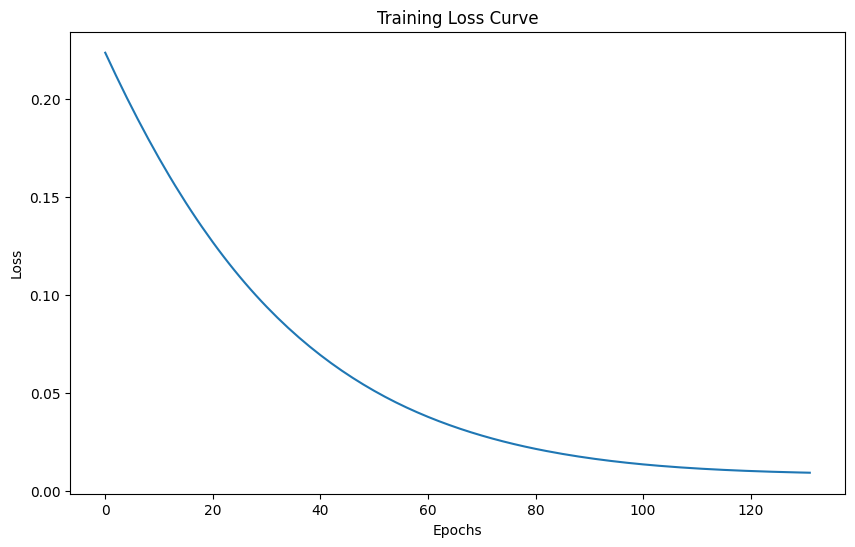

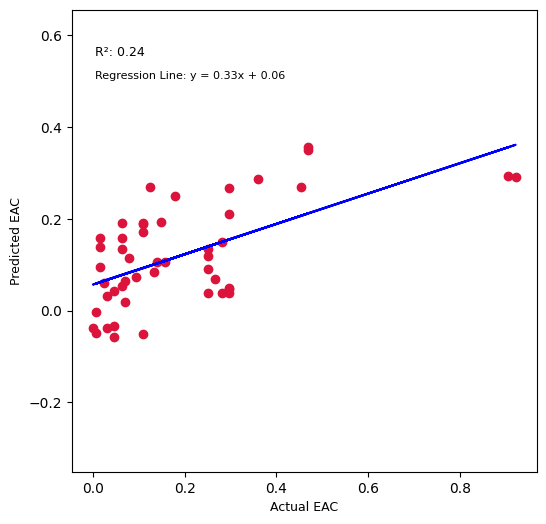

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [-0.0567932   0.04387658  0.06855853  0.03815892  0.01952127  0.19171494
  0.06430971  0.09610198  0.28744238  0.04913315  0.2664965  -0.03821852
  0.10623911  0.09095593  0.35099984  0.18898347  0.17160624  0.13518557
  0.29376594  0.10623911 -0.03295604  0.29100889  0.15803325  0.13459581
  0.25018359  0.15846611  0.05279992  0.03815892  0.13940779  0.35581248
  0.14894586  0.26852326  0.03815892  0.19111796  0.03164406 -0.03838904
 -0.00309121 -0.05131108  0.04670305  0.19306413  0.26942366  0.209

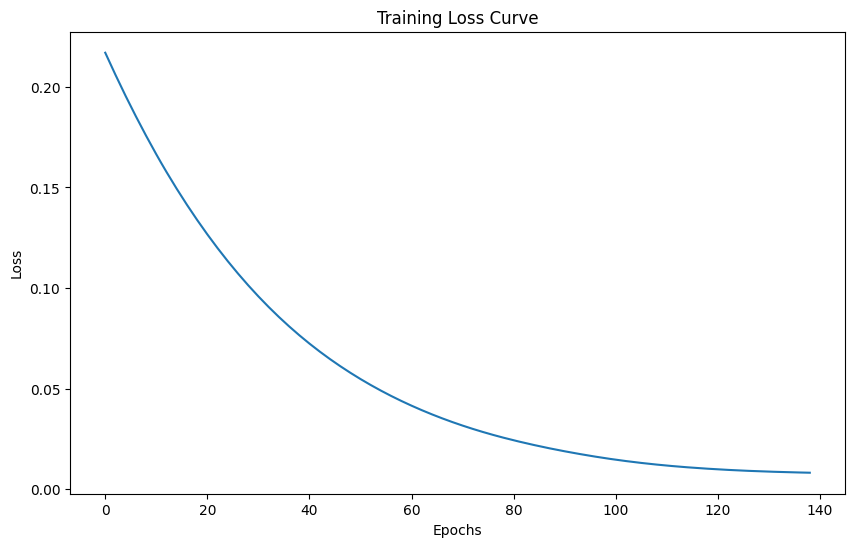

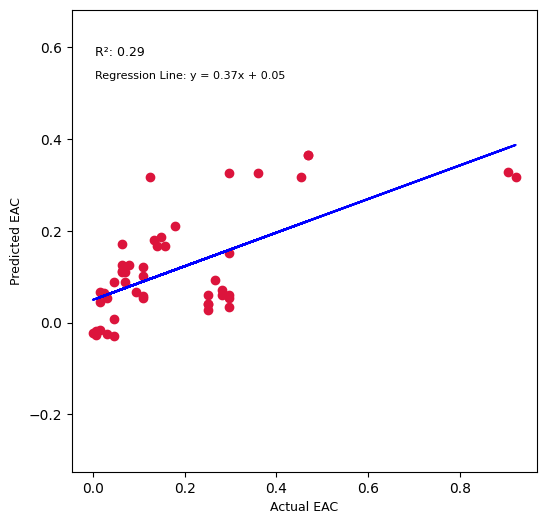

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [ 0.00765101  0.0877358   0.09267773  0.06036614  0.11107347  0.0583775
  0.08821221 -0.01615343  0.32505901  0.05441212  0.32540076 -0.02183343
  0.16741892  0.02805455  0.36443592  0.05391198  0.12215141  0.03974483
  0.32743002  0.16741892 -0.0304181   0.31783933  0.12633616  0.17156182
  0.21008451  0.06588462  0.11107347  0.06036614  0.04526331  0.36443592
  0.07205642  0.31647503  0.06036614  0.11346519  0.05351901 -0.0239381
 -0.01886168  0.10175725  0.03400858  0.18625402  0.31681267  0.15092

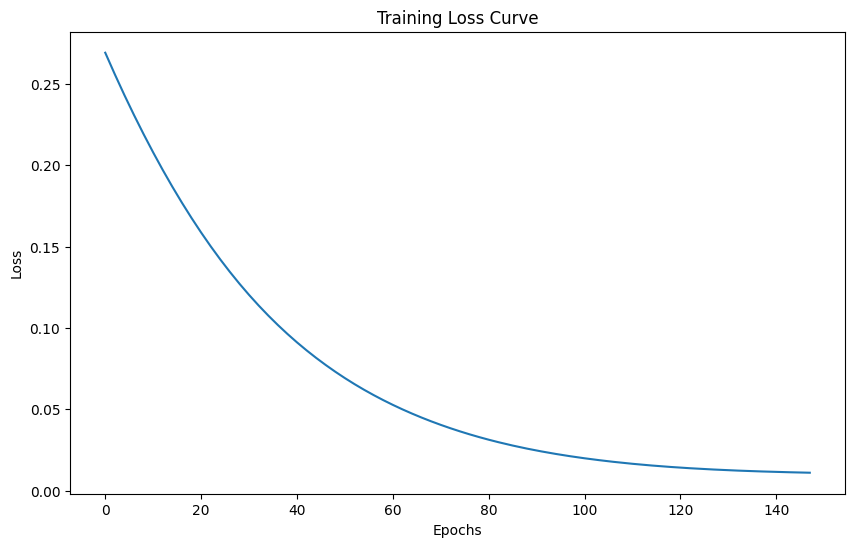

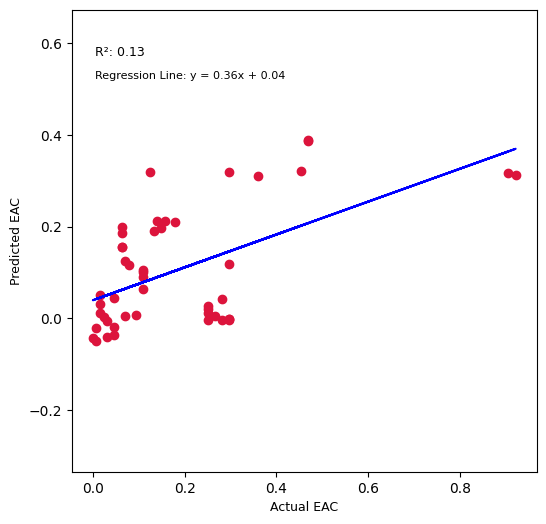

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [-0.01975173  0.04362281  0.00580418 -0.00409607  0.12493248  0.10511238
  0.00424986  0.01248787  0.30978974 -0.00102576  0.31899666 -0.04384644
  0.21120727  0.0117174   0.38613815  0.10070967  0.06459923  0.02641787
  0.31619293  0.21120727 -0.0374236   0.31292141  0.15527239  0.18526956
  0.20973561  0.05073454  0.15640458 -0.00409607  0.03099619  0.38844042
  0.04133365  0.31892185 -0.00409607  0.19974177 -0.00647937 -0.04061657
 -0.02034297  0.08974326 -0.00163841  0.19756262  0.3204959   0.118

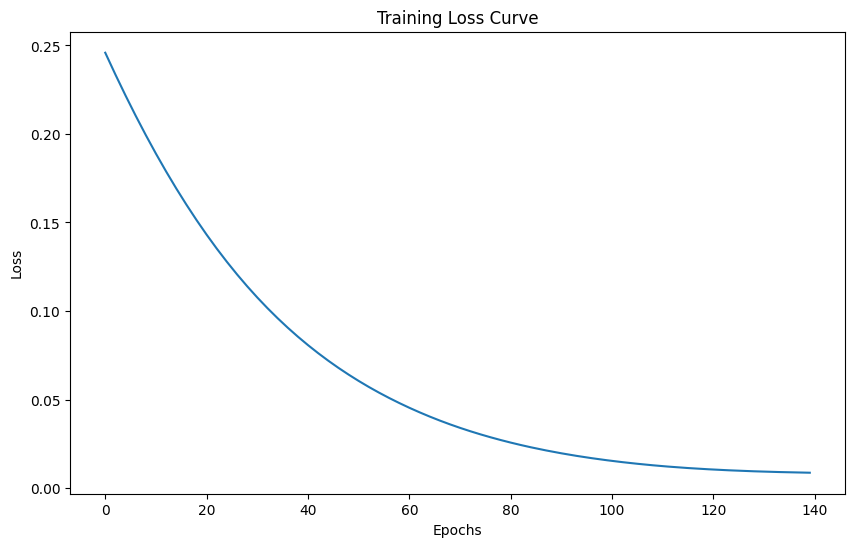

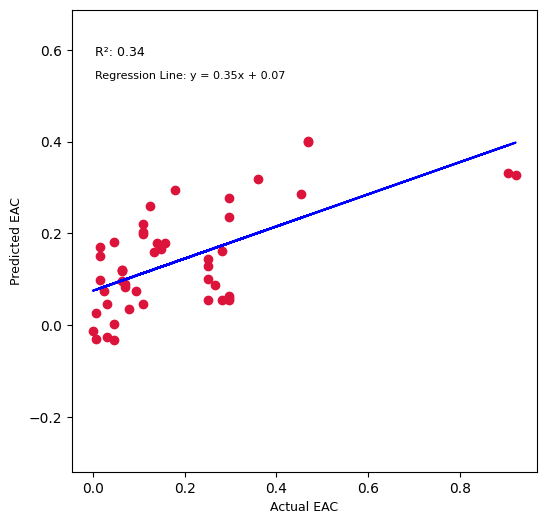

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [ 0.0031522   0.18060603  0.0866029   0.05363532  0.08905399  0.20206569
  0.08193874  0.09913787  0.31931416  0.06346716  0.2765681  -0.01386084
  0.17961677  0.10092142  0.3984941   0.19896053  0.21934567  0.14484251
  0.33069501  0.17961677 -0.03331688  0.32640642  0.12065569  0.09714229
  0.2943691   0.17037037  0.12115547  0.05363532  0.14960475  0.40117789
  0.16175936  0.26035403  0.05363532  0.11842382  0.04648359 -0.02581839
  0.02601922  0.04692708  0.0589881   0.16679759  0.28513389  0.235

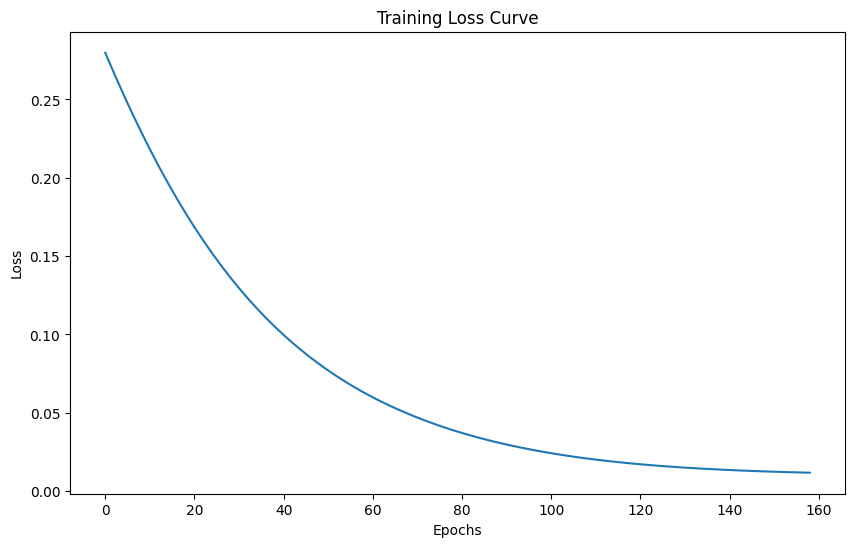

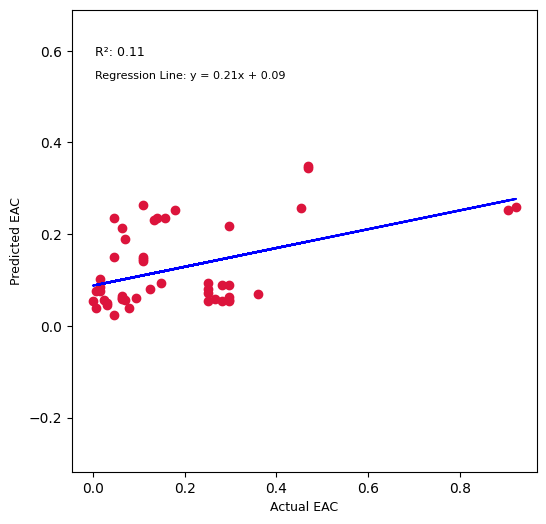

y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [0.1495025  0.23545818 0.05762404 0.05316024 0.19008039 0.14988079
 0.05539214 0.10282182 0.06911838 0.0571291  0.21735774 0.05319199
 0.23427985 0.0723965  0.34326845 0.14558824 0.14058013 0.09352712
 0.25317655 0.23427985 0.02287252 0.25954137 0.06500249 0.05826688
 0.2520655  0.08506671 0.21354802 0.05316024 0.07660631 0.34843338
 0.08887977 0.08105333 0.05316024 0.05979434 0.049738   0.04460462
 0.07705475 0.26323415 0.06232272 0.09424121 0.25714839 0.08887977
 0.05679867 0.23056886 0.08041937 0.

,Features,Test Loss,MAE,MSE,RMSE,SI,R-Value,Model
0,"[Total Area of Building, Duration of construct...",0.008696,0.114362,0.028851,0.169855,0.899647,0.264739,4-80-20 model
1,"[Total Area of Building, Duration of construct...",0.007217,0.111303,0.027630,0.166222,0.880401,0.295860,4-80-20 model
2,"[Total Area of Building, Duration of construct...",0.009210,0.119480,0.029921,0.172976,0.916177,0.237470,4-80-20 model
3,"[Total Area of Building, Duration of construct...",0.008235,0.109625,0.027886,0.166991,0.884476,0.289328,4-80-20 model
4,"[Total Area of Building, Duration of construct...",0.010937,0.126391,0.034002,0.184397,0.976670,0.133450,4-80-20 model
5,"[Total Area of Building, Duration of construct...",0.008674,0.109360,0.026014,0.161288,0.854271,0.337038,4-80-20 model
6,"[Total Area of Building, Site access, Number o...",0.011729,0.129222,0.034804,0.186557,0.988109,0.113034,4-80-20 model


In [15]:
pt, mds = combine_input_variables(4, ranked_features2,X2,y2, '80-20 model')
all_results = pd.concat([all_results, mds], ignore_index=True)

# Feature engineering

```
Reprocess the data ans add extra features:
 'Year of construct',
 'location',
 'Duration of construction/Demolition (Month)',
 'Type of building',
 'Total Area of Building',
 'Number of floor',
 'Site access',
 'Area_Floor_Interaction',
 'Log_Total_Area',
 'Sqrt_Number_of_Floor',
 'Duration_Type_Interaction',
 'Location_Access_Interaction',
 'Amount of Waste (No. of Trucks)'
```



In [16]:
import numpy as np

# Step 5.1: Feature Engineering

# Create new interaction features
data_cleaned['Area_Floor_Interaction'] = data_cleaned['Total Area of Building'] * data_cleaned['Number of floor']
data_cleaned['Log_Total_Area'] = np.log1p(data_cleaned['Total Area of Building'])
data_cleaned['Sqrt_Number_of_Floor'] = np.sqrt(data_cleaned['Number of floor'])
data_cleaned['Duration_Type_Interaction'] = data_cleaned['Duration of construction/Demolition (Month)'] * data_cleaned['Type of building']
data_cleaned['Location_Access_Interaction'] = data_cleaned['location'] * data_cleaned['Site access']
column_to_move = data_cleaned.pop('Amount of Waste (No. of Trucks)')
data_cleaned.insert(12, 'Amount of Waste (No. of Trucks)', column_to_move)

# Display the first few rows of the data with new features
data_cleaned.head()


,Year of construct,location,Duration of construction/Demolition (Month),Type of building,Total Area of Building,Number of floor,Site access,Area_Floor_Interaction,Log_Total_Area,Sqrt_Number_of_Floor,Duration_Type_Interaction,Location_Access_Interaction,Amount of Waste (No. of Trucks)
0,0.909091,0.25,0.029412,0.75,0.012313,0.000000,0.0,0.000000,0.012238,0.000000,0.022059,0.0,0.03125
1,0.909091,0.00,0.000000,0.75,0.001493,0.071429,0.0,0.000107,0.001491,0.267261,0.000000,0.0,0.00000
2,0.909091,0.25,0.294118,0.75,0.087313,0.142857,0.0,0.012473,0.083710,0.377964,0.220588,0.0,0.03125
3,0.909091,0.25,0.000000,1.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
4,0.909091,0.25,0.000000,0.75,0.001269,0.000000,0.0,0.000000,0.001268,0.000000,0.000000,0.0,0.00000


Selected features: [4 7]
Ranked features by importance: [4, 7]


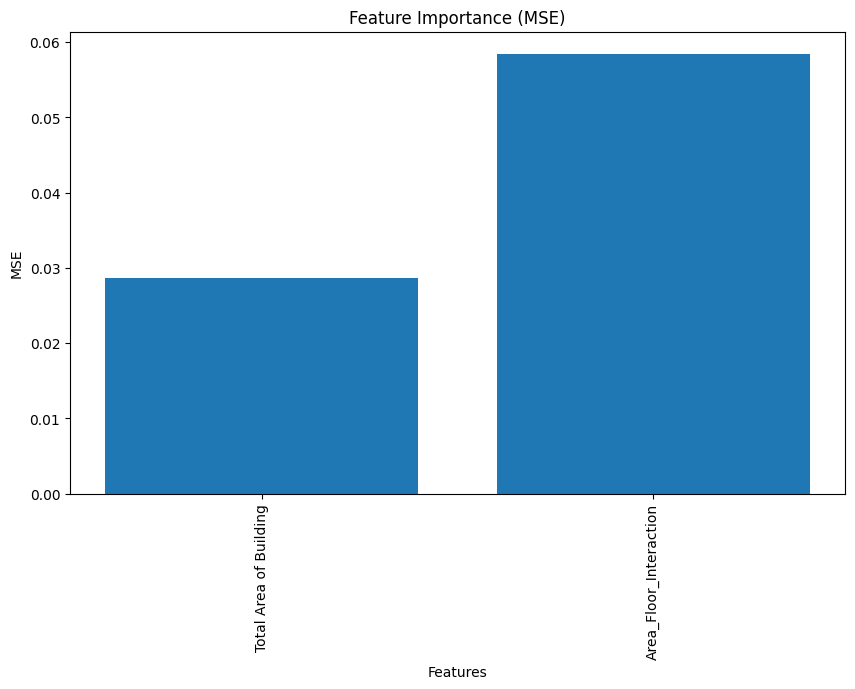

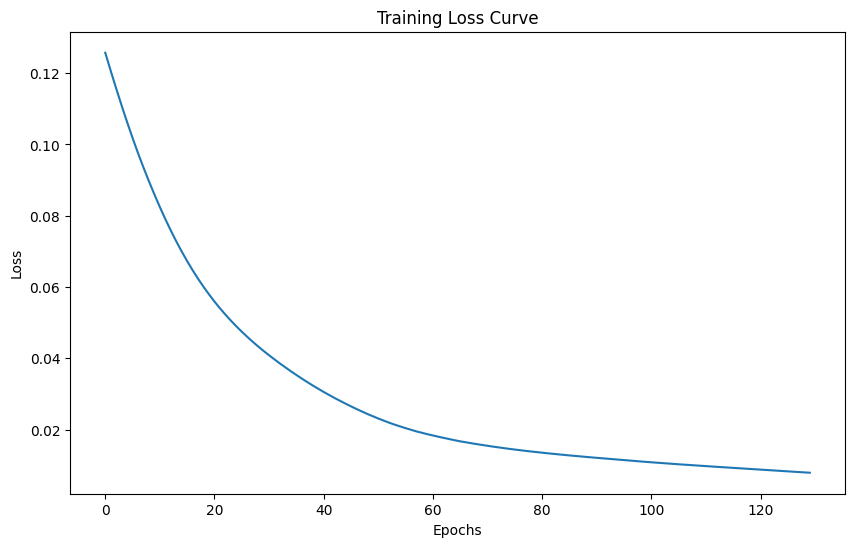

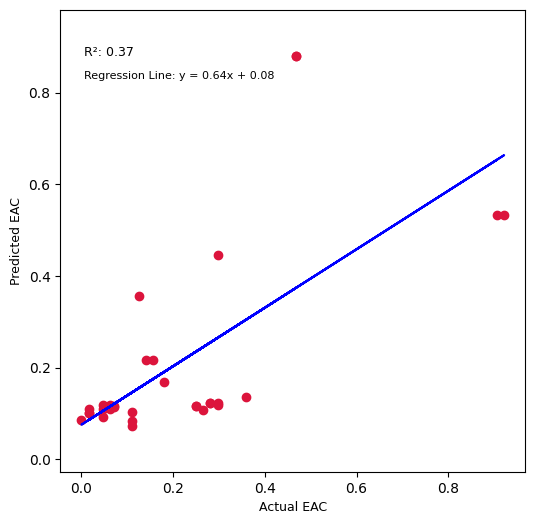

,Features,Test Loss,MAE,MSE,RMSE,SI,R-Value,Model
0,"[Total Area of Building, Area_Floor_Interaction]",0.007918,0.133506,0.031014,0.176107,0.830073,0.369673,Engineered Features


y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125    ]
y_pred:  [0.11906476 0.10914486 0.10843487 0.12234911 0.11414348 0.07293339
 0.11539199 0.10070674 0.13672443 0.11906476 0.44536304 0.08572557
 0.2177386  0.1173862  0.88074012 0.08385857 0.10288503 0.1173862
 0.53369731 0.2177386  0.09246066 0.53369731 0.10948883 0.11879812
 0.16859119 0.10984205 0.11414348 0.12234911 0.10070674 0.88074012
 0.12234911 0.35666323]

Model Performance Metrics:
MAE: 0.13350646525368817
MSE: 0.031013601729562527
RMSE: 0.17610679069690222
SI: 0.830072974332004
R-Value: 0.3696727655641826
Test Loss: 0.007917882293116461


In [17]:

# Load your dataset from an Excel file
# Assuming the last column is the label
X = data_cleaned.iloc[:, :-1].values
y = data_cleaned.iloc[:, -1].values

# Ensure y is of numeric type
y = y.astype(float)

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X3 = X
y3 = y
# Normalize the features
scaler = StandardScaler()
# X = scaler.fit_transform(X)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
feature_names = data_cleaned.columns.values.tolist()
num_features = X.shape[1]
gwo = GWO(num_features, num_wolves=10, max_iter=30)
selected_features = gwo.optimize(X, y,0.2)
print("Selected features:", selected_features)

# Evaluate and rank the importance of each selected feature
feature_importance = {}
for feature in selected_features:
    X_selected = X[:, [feature]]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    # Calculate MSE for the feature
    mse = mean_squared_error(y_test, y_pred)
    feature_importance[feature] = mse

# Rank features by importance (MSE)
ranked_features = sorted(feature_importance, key=feature_importance.get)
print("Ranked features by importance:", ranked_features)

ranked_features3 = ranked_features

plotbar(ranked_features, feature_names)

# Initialize results DataFrame
results = pd.DataFrame(columns=['Features', 'Test Loss', 'MAE', 'MSE', 'RMSE', 'SI', 'R-Value'])




# Evaluate the model with the selected and ranked features
X_selected = X[:, ranked_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the MLP regressor
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)


pltloss(mlp)
make_r_plot(y_test,y_pred)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_value = r2_score(y_test, y_pred)
si = rmse / np.mean(y_test)
test_loss = mlp.loss_

feature_important_names = [feature_names[f] for f in feature_importance]

# Append results using pd.concat
new_row = pd.DataFrame({
    'Model':['Engineered Features'],
    'Features': [feature_important_names],
    'Test Loss': [test_loss],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'SI': [si],
    'R-Value': [r_value]
})
results = pd.concat([results, new_row], ignore_index=True)
all_results = pd.concat([all_results, new_row], ignore_index=True)
display(results)
print("y_test: ", y_test)
print("y_pred: ", y_pred)


# Print the performance metrics
print("\nModel Performance Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"SI: {si}")
print(f"R-Value: {r_value}")
print(f"Test Loss: {test_loss}")

## Combine two, three, four.... inputs

In [18]:
_, pts = combine_input_variables(2, ranked_features3,X3,y3,'Engineered model')
all_results = pd.concat([all_results, pts], ignore_index=True)

,Features,Test Loss,MAE,MSE,RMSE,SI,R-Value


In [19]:
_,pts = combine_input_variables(3, ranked_features3,X3,y3, 'Engineered Model')
all_results = pd.concat([all_results, pts], ignore_index=True)

Number of combination is greater than the size of the ranked features


In [20]:
_, pts = combine_input_variables(3, ranked_features3 ,X3,y3,'Engineered Model')
results = pd.concat([results, pts], ignore_index=True)

Number of combination is greater than the size of the ranked features


# CROSS VALIDATION TASK



```
Cross-Validation in Fitness Calculation: The fitness method in the GWO class now uses cross_val_score with KFold cross-validation to calculate the mean MSE.


Cross-Validation for Final Evaluation: The final evaluation of the model with the selected features uses

cross_validate to obtain performance metrics from cross-validation.
Handling MSE as Test Loss: The mean MSE from cross-validation is used as the test loss for reporting.
```



Selected features: [ 4  6 10]
Ranked features by importance: [4, 6, 10]

Model Performance Metrics:
MAE: 0.10504283859958222
MSE: 0.020794098101383395
RMSE: 0.144201588414911
SI: 0.9194422573902172
R-Value: -0.0023017207578384102
Test Loss: 0.020794098101383395


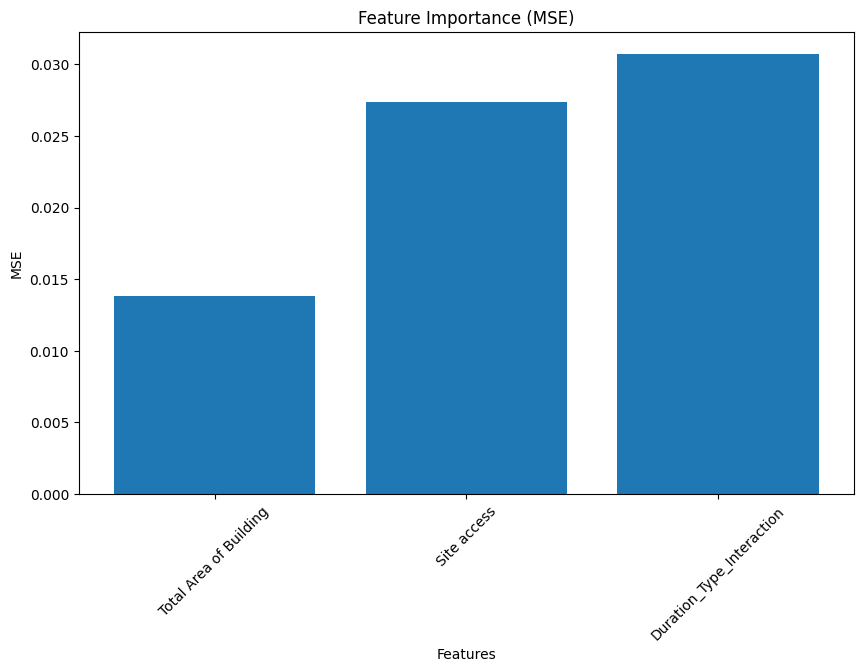

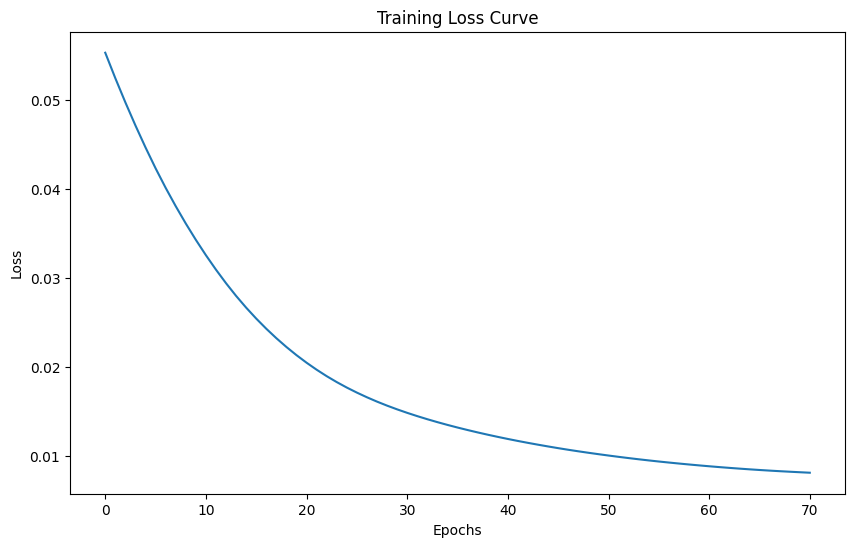

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore convergence warnings for simplicity
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

# Define the Grey Wolf Optimizer class
class GWO_crossval:
    def __init__(self, num_features, num_wolves=5, max_iter=20):
        self.num_features = num_features
        self.num_wolves = num_wolves
        self.max_iter = max_iter
        self.alpha_pos = np.zeros(num_features)
        self.beta_pos = np.zeros(num_features)
        self.delta_pos = np.zeros(num_features)
        self.alpha_score = float("inf")
        self.beta_score = float("inf")
        self.delta_score = float("inf")
        self.population = np.random.randint(2, size=(num_wolves, num_features))

    def fitness(self, wolf, data, labels):
        selected_features = np.where(wolf == 1)[0]
        if selected_features.size == 0:
            return float("inf")
        X_selected = data[:, selected_features]

        # Define the regressor
        regressor = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

        # Use cross-validation to calculate the mean MSE
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        mse_scores = cross_val_score(regressor, X_selected, labels, cv=cv, scoring='neg_mean_squared_error')
        mean_mse = -mse_scores.mean()

        return mean_mse

    def update_position(self, wolf):
        a = 2 * (1 - (self.iteration / self.max_iter))
        r1, r2 = np.random.random(2)
        A1 = 2 * a * r1 - a
        C1 = 2 * r2
        D_alpha = abs(C1 * self.alpha_pos - wolf)
        X1 = self.alpha_pos - A1 * D_alpha

        r1, r2 = np.random.random(2)
        A2 = 2 * a * r1 - a
        C2 = 2 * r2
        D_beta = abs(C2 * self.beta_pos - wolf)
        X2 = self.beta_pos - A2 * D_beta

        r1, r2 = np.random.random(2)
        A3 = 2 * a * r1 - a
        C3 = 2 * r2
        D_delta = abs(C3 * self.delta_pos - wolf)
        X3 = self.delta_pos - A3 * D_delta

        new_wolf = (X1 + X2 + X3) / 3
        return np.clip(new_wolf, 0, 1)

    def binarize(self, wolf):
        return (wolf > 0.5).astype(int)

    def optimize(self, data, labels):
        for self.iteration in range(self.max_iter):
            for i in range(self.num_wolves):
                fitness = self.fitness(self.population[i], data, labels)
                if fitness < self.alpha_score:
                    self.delta_score = self.beta_score
                    self.delta_pos = self.beta_pos.copy()
                    self.beta_score = self.alpha_score
                    self.beta_pos = self.alpha_pos.copy()
                    self.alpha_score = fitness
                    self.alpha_pos = self.population[i].copy()
                elif fitness < self.beta_score:
                    self.delta_score = self.beta_score
                    self.delta_pos = self.beta_pos.copy()
                    self.beta_score = fitness
                    self.beta_pos = self.population[i].copy()
                elif fitness < self.delta_score:
                    self.delta_score = fitness
                    self.delta_pos = self.population[i].copy()

            for i in range(self.num_wolves):
                new_wolf = self.update_position(self.population[i])
                self.population[i] = self.binarize(new_wolf)

        return np.where(self.alpha_pos == 1)[0]

# Load your dataset from an Excel file


# Assuming the last column is the label
X = data_all.iloc[:, :-1].values

y = data_all.iloc[:, -1].values

feature_names = data_all.columns.values.tolist()

# Ensure y is of numeric type
y = y.astype(float)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

num_features = X.shape[1]
gwo = GWO_crossval(num_features, num_wolves=10, max_iter=30)
selected_features = gwo.optimize(X, y)
print("Selected features:", selected_features)

# Evaluate and rank the importance of each selected feature
feature_importance = {}
for feature in selected_features:
    X_selected = X[:, [feature]]
    regressor = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = cross_val_score(regressor, X_selected, y, cv=cv, scoring='neg_mean_squared_error')
    mean_mse = -mse_scores.mean()
    feature_importance[feature] = mean_mse

# Rank features by importance (MSE)
ranked_features = sorted(feature_importance, key=feature_importance.get)
print("Ranked features by importance:", ranked_features)

# Evaluate the model with the selected and ranked features using cross-validation
X_selected = X[:, ranked_features]
regressor = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

cv_results = cross_validate(regressor, X_selected, y, cv=cv, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'))
mae_scores = -cv_results['test_neg_mean_absolute_error']
mse_scores = -cv_results['test_neg_mean_squared_error']
r2_scores = cv_results['test_r2']

mean_mae = mae_scores.mean()
mean_mse = mse_scores.mean()
mean_rmse = np.sqrt(mean_mse)
mean_r2 = r2_scores.mean()
mean_si = mean_rmse / np.mean(y)
test_loss = mean_mse  # Using mean MSE as test loss
feature_important_names = [feature_names[f] for f in feature_importance]

new_row = pd.DataFrame({
    'Model': ['cross val Model'],
    'Features': [feature_important_names],
    'Test Loss': [test_loss],
    'MAE': [mean_mae],
    'MSE': [mean_mse],
    'RMSE': [mean_rmse],
    'SI': [mean_si],
    'R-Value': [mean_r2]
})
all_results = pd.concat([all_results, new_row], ignore_index=True)

# Print the performance metrics
print("\nModel Performance Metrics:")
print(f"MAE: {mean_mae}")
print(f"MSE: {mean_mse}")
print(f"RMSE: {mean_rmse}")
print(f"SI: {mean_si}")
print(f"R-Value: {mean_r2}")
print(f"Test Loss: {test_loss}")

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(ranked_features)), [feature_importance[feature] for feature in ranked_features])
plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('MSE')
plt.title('Feature Importance (MSE)')
plt.show()
regressor.fit(X_selected, y)
# Plotting the training loss curve
plt.figure(figsize=(10, 6))
plt.plot(regressor.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


# Tweaking Weights of Feature Importance



```
This code:
Normalizes the calculated importances to use them as weights.

Inverts the MSE scores to get higher weights for more important features (lower MSE).

Normalizes the weights so that their sum equals 1.
```



Selected features: [ 0  1  2  4  6  7  8 11]
Ranked features by importance: [8, 4, 2, 6, 11, 0, 7, 1]


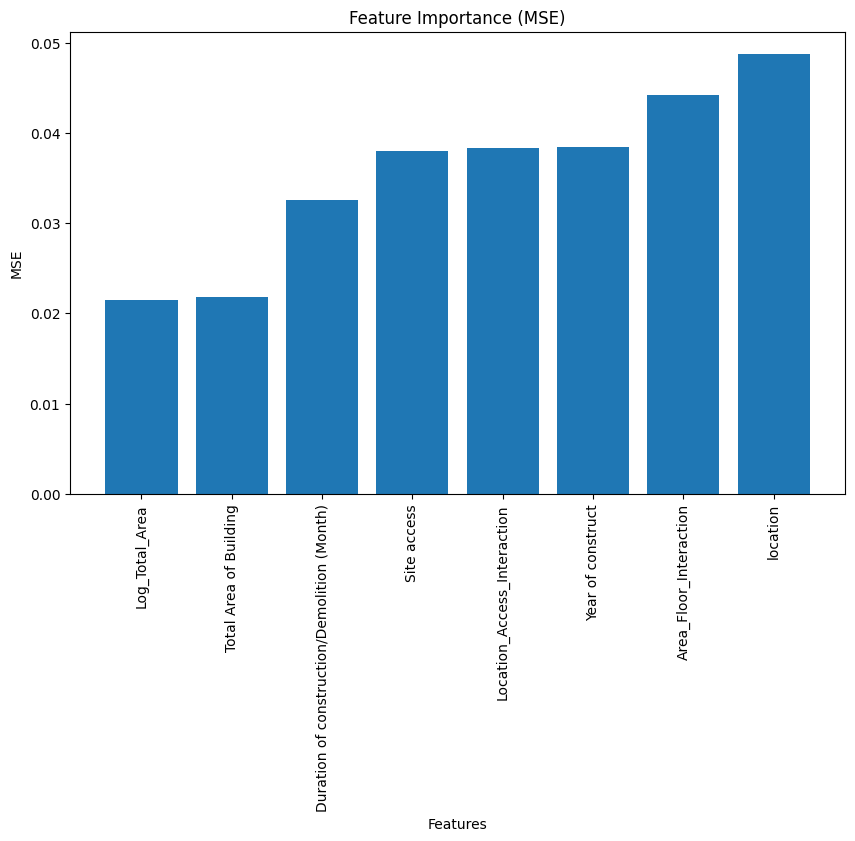

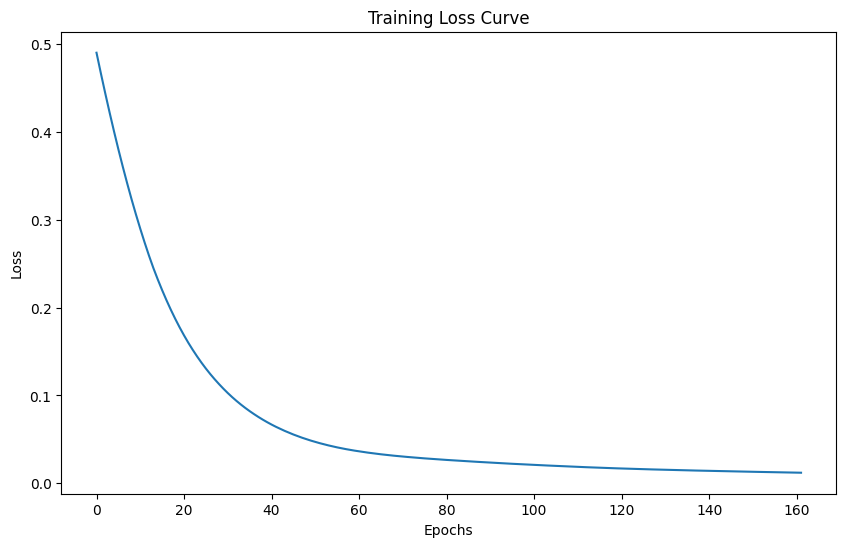

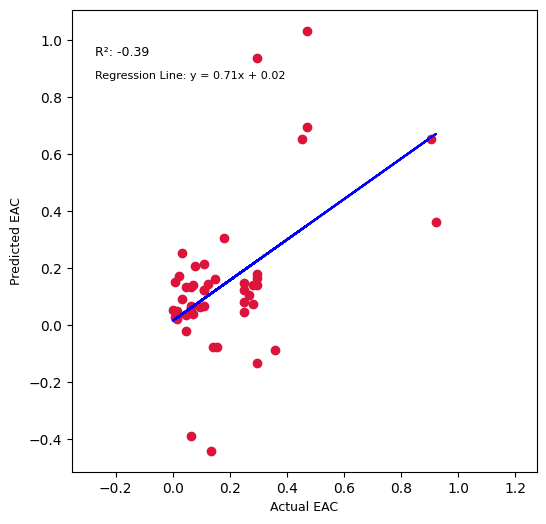

,Features,Test Loss,MAE,MSE,RMSE,SI,R-Value,Model
0,"[Year of construct, location, Duration of cons...",0.012054,0.16386,0.054701,0.233882,1.23877,-0.394052,Tweaking Weights of Features


y_test:  [0.046875  0.046875  0.265625  0.296875  0.0703125 0.109375  0.0703125
 0.015625  0.359375  0.296875  0.296875  0.        0.15625   0.25
 0.46875   0.109375  0.109375  0.25      0.90625   0.140625  0.046875
 0.921875  0.0625    0.0625    0.1796875 0.015625  0.0625    0.28125
 0.015625  0.46875   0.28125   0.125     0.25      0.0625    0.03125
 0.03125   0.0078125 0.109375  0.296875  0.1484375 0.453125  0.296875
 0.0234375 0.1328125 0.25      0.078125  0.0078125 0.09375  ]
y_pred:  [ 0.03440544 -0.02218382  0.10471746  0.13877473  0.03909719  0.1225299
  0.13878956  0.04942533 -0.08788094  0.16416612  0.93498763  0.05140858
 -0.07753855  0.04706929  0.69535492  0.12376396  0.21535055  0.14604856
  0.65202766 -0.07753855  0.13492552  0.36215943  0.06531833  0.06068011
  0.3065948   0.03430879 -0.38830804  0.13877473  0.02262737  1.03174046
  0.07390644  0.14569312  0.0809051   0.13300423  0.09295506  0.25131777
  0.15142951  0.06683917  0.1773657   0.1627758   0.65166083 -0.1334

In [22]:
# Load your dataset from an Excel file
# Assuming the last column is the label
X = data_all.iloc[:, :-1].values
y = data_all.iloc[:, -1].values

feature_names = data_all.columns.values.tolist()
# Ensure y is of numeric type
y = y.astype(float)

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Normalize the features

# X = scaler.fit_transform(X)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

num_features = X.shape[1]
test_size = 0.3
gwo = GWO(num_features, num_wolves=10, max_iter=30)
selected_features = gwo.optimize(X, y,test_size)
print("Selected features:", selected_features)

# Evaluate and rank the importance of each selected feature
feature_importance = {}
for feature in selected_features:
    X_selected = X[:, [feature]]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    # Calculate MSE for the feature
    mse = mean_squared_error(y_test, y_pred)
    feature_importance[feature] = mse

# Rank features by importance (MSE)
ranked_features = sorted(feature_importance, key=feature_importance.get)
ranked_features1 = ranked_features
print("Ranked features by importance:", ranked_features)

plotbar(ranked_features, feature_names)



# Initialize results DataFrame
results = pd.DataFrame(columns=['Features', 'Test Loss', 'MAE', 'MSE', 'RMSE', 'SI', 'R-Value'])


# we assign weights base on feature importance to each feature
# Compute feature weights
total_importance = sum(1 / (feature_importance[f] + 1e-6) for f in ranked_features)
feature_weights = {f: (1 / (feature_importance[f] + 1e-6)) / total_importance for f in ranked_features}

# Evaluate the model with the selected and ranked features with weights
X_selected = X[:, ranked_features]
X_weighted = X_selected.copy()
for i, feature in enumerate(ranked_features):
    X_weighted[:, i] *= feature_weights[feature]

X_train, X_test, y_train, y_test = train_test_split(X_weighted, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the MLP regressor
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)


pltloss(mlp)
make_r_plot(y_test,y_pred)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_value = r2_score(y_test, y_pred)
si = rmse / np.mean(y_test)
test_loss = mlp.loss_

feature_important_names = [feature_names[f] for f in feature_importance]

# Append results using pd.concat
new_row = pd.DataFrame({
    'Model': ['Tweaking Weights of Features'],
    'Features': [feature_important_names],
    'Test Loss': [test_loss],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'SI': [si],
    'R-Value': [r_value]
})
results = pd.concat([results, new_row], ignore_index=True)
all_results = pd.concat([all_results, new_row], ignore_index=True)

display(results)
print("y_test: ", y_test)
print("y_pred: ", y_pred)


# Print the performance metrics
print("\nModel Performance Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"SI: {si}")
print(f"R-Value: {r_value}")
print(f"Test Loss: {test_loss}")

# MODEL SUMMARY

In [23]:
all_results

,Model,Features,Test Loss,MAE,MSE,RMSE,SI,R-Value
0,70-30 Split,"[location, Duration of construction/Demolition...",0.008229,0.146240,0.047090,0.217002,1.149361,-0.200081
1,2-70-30 model,"[Total Area of Building, Duration of construct...",0.007056,0.112133,0.031004,0.176078,0.932607,0.209877
2,80-20 Model,"[Year of construct, Duration of construction/D...",0.011150,0.183496,0.054619,0.233707,1.101568,-0.110084
3,2-80-20 model,"[Total Area of Building, Duration of construct...",0.007056,0.112133,0.031004,0.176078,0.932607,0.209877
4,3-80-20 model,"[Total Area of Building, Duration of construct...",0.008085,0.121251,0.028910,0.170028,0.900564,0.263239
5,4-80-20 model,"[Total Area of Building, Duration of construct...",0.008674,0.109360,0.026014,0.161288,0.854271,0.337038
6,Engineered Features,"[Total Area of Building, Area_Floor_Interaction]",0.007918,0.133506,0.031014,0.176107,0.830073,0.369673
7,cross val Model,"[Total Area of Building, Site access, Duration...",0.020794,0.105043,0.020794,0.144202,0.919442,-0.002302
8,Tweaking Weights of Features,"[Year of construct, location, Duration of cons...",0.012054,0.163860,0.054701,0.233882,1.238770,-0.394052
